# 0. Attrition Analysis

> Data is from [IBM HR Analytics Employee Attrition & Performance](#https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

Employee attrition is a big issue among many companies. Balance [lessening employee turnover](#http://bit.ly/2f8I4js) and employee attrition is a kind of trade off. Although more than 40 percent of employees have potential to attrition, companies are still taking healthy growth seriously. Take many Chinese internet companies as examples, large enterprises like NetEase and Huawei, employee attrition is a big concern although they can recruit numerous fresh employees every year. Key person risk may be ringing the bell for the company’s CEO and making the company in jeopardy, however, ordinary employee like you and me, who leaving the company as the company grows, can also raise the red flag for the company. Attrition is essentially the slow decay of a company and if the management does not take action to this, the workforce will shrink, production will stop, and the company will likely go out of business. However, if these companies can tackle this challenge, more positive growth of turnover would be earned. Therefore, this problem catches our attention and our team are deciding to make a best fit prediction model for predicting employee attrition in one company based on assorted variables. In a research of McKinsey on people analytics, the intelligence included a range of information from the employee such as levels of compensation and demographic profile can indeed predict or raising red flag on certain employee so that the machine can help HR in one enterprise to make decisions in some ways.

# 1. Preparation

## 1.1 Import Packages

Import some data analysis and data visualization packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)

## 1.2  Overview of Data Set

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.shape)
display(df.head())

(1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

By overview of data set, it can be found that this data set include 1470 observations and 35 features. But feature 'Over18', 'EmployeeCount' and 'StandardHours' are exactly same in every rows and 'EmployeeNumber' is the number that tag employees so we decide to drop these columns.

In [3]:
df = df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'])

Sign the category of categorical features.

In [4]:
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
education_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
job_involvement_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
job_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
performance_rating_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
relationship_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
work_life_balance_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
# Use the pandas apply method to numerically encode our attrition target variable
df['Education'] = df["Education"].apply(lambda x: education_map[x])
df['EnvironmentSatisfaction'] = df["EnvironmentSatisfaction"].apply(lambda x: education_satisfaction_map[x])
df['JobInvolvement'] = df["JobInvolvement"].apply(lambda x: job_involvement_map[x])
df['JobSatisfaction'] = df["JobSatisfaction"].apply(lambda x: job_satisfaction_map[x])
df['PerformanceRating'] = df["PerformanceRating"].apply(lambda x: performance_rating_map[x])
df['RelationshipSatisfaction'] = df["RelationshipSatisfaction"].apply(lambda x: relationship_satisfaction_map[x])
df['WorkLifeBalance'] = df["WorkLifeBalance"].apply(lambda x: work_life_balance_map[x])

Then check the data set again.

In [5]:
print(df.shape)
display(df.head())

(1470, 31)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                 1        College  Life Sciences                  Medium   
1                 8  Below College  Life Sciences                    High   
2                 2        College          Other               Very High   
3                 3         Master  Life Sciences               Very High   
4                 2  Below College        Medical                     Low   

   Gender  HourlyRate JobInvolvement  JobLevel                JobRole  \
0  Female          94           High         2        Sales Executive   
1    Male          61         Medium         2     Research Scientist   
2    Male          92         Medium         1  Laboratory Technician   
3  Female          56           High         1     Research Scientist   
4    Male          40           High         1  Laboratory Technician   

  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0       Very High        Single           5993        19479   
1          Medium       Married           5130        24907   
2            High        Single           2090         2396   
3            High       Married           2909        23159   
4          Medium       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike PerformanceRating  \
0                   8      Yes                 11         Excellent   
1                   1       No                 23       Outstanding   
2                   6      Yes                 15         Excellent   
3                   1      Yes                 11         Excellent   
4                   9       No                 12         Excellent   

  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                      Low                 0                  8   
1                Very High                 1                 10   
2                   Medium                 0                  7   
3                     High                 0                  8   
4                Very High                 1                  6   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0             Bad               6                   4   
1                      3          Better              10                   7   
2                      3          Better               0                   0   
3                      3          Better               8                   7   
4                      3          Better               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

### Type of Features

#### Categorical
- **Nominal**
    - Attrition
    - BusinessTravel
    - Department
    - EducationField
    - Gender
    - JobRole
    - MaritalStatus
    - OverTime
- **Ordinal**
    - Education
    - EnvironmentSatisfaction
    - JobInvolvement
    - JobLevel
    - JobSatisfaction
    - PerformanceRating
    - RelationshipSatisfaction
    - StockOptionLevel
    - WorkLifeBalance
    
#### Numerical
- **Continuous**
    - Age
    - DailyRate
    - DistanceFromHome	
    - HourlyRate
    - MonthlyIncome
    - MonthlyRate
    - NumCompaniesWorked
    - PercentSalaryHike
    - TotalWorkingYears
    - TrainingTimesLastYear
    - YearsAtCompany
    - YearsInCurrentRole
    - YearsSinceLastPromotion
    - YearsWithCurrManager

## 1.3 Check Missing Values

In [6]:
print("Missing Value:", df.isnull().any().any())

Missing Value: False


This is complete data set that contain no missing values.

# 2. EDA (Exploratory Data Analysis)

## 2.1 Distribution of Target Variable

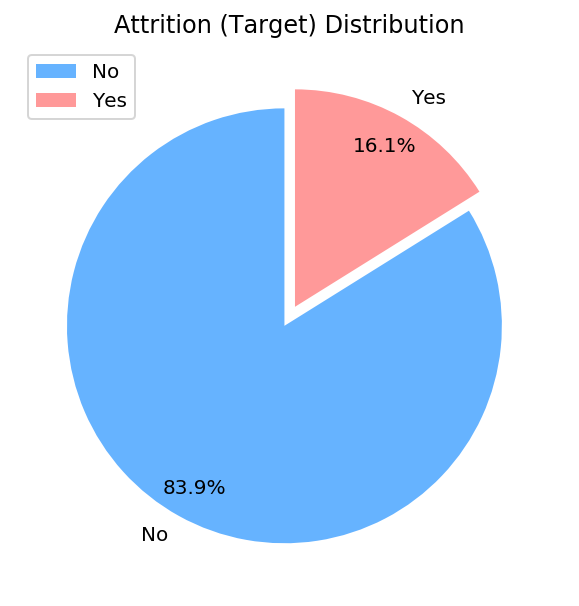

In [7]:
colors = ['#66b3ff', '#ff9999']
explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
plt.pie(df['Attrition'].value_counts(), colors = colors, labels=['No', 'Yes'], 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.legend()
plt.title("Attrition (Target) Distribution")
plt.savefig('figures/arrtirion_distribution.png', dpi=300)

Note that the distribution of target variable is quite unbalanced that 16.1% of employees decide to leave but most employees decide to stay. It should be notice that this unbalance may influence the learning model later.

## 2.2 Frequency Analysis

### 2.2.1 Frequency Analysis of Numerical Features

The numerical features in these data set are: 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion' and 'YearsWithCurrManager'.

In [8]:
numerical_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Plot the distribution graph of these features and find some pattern.

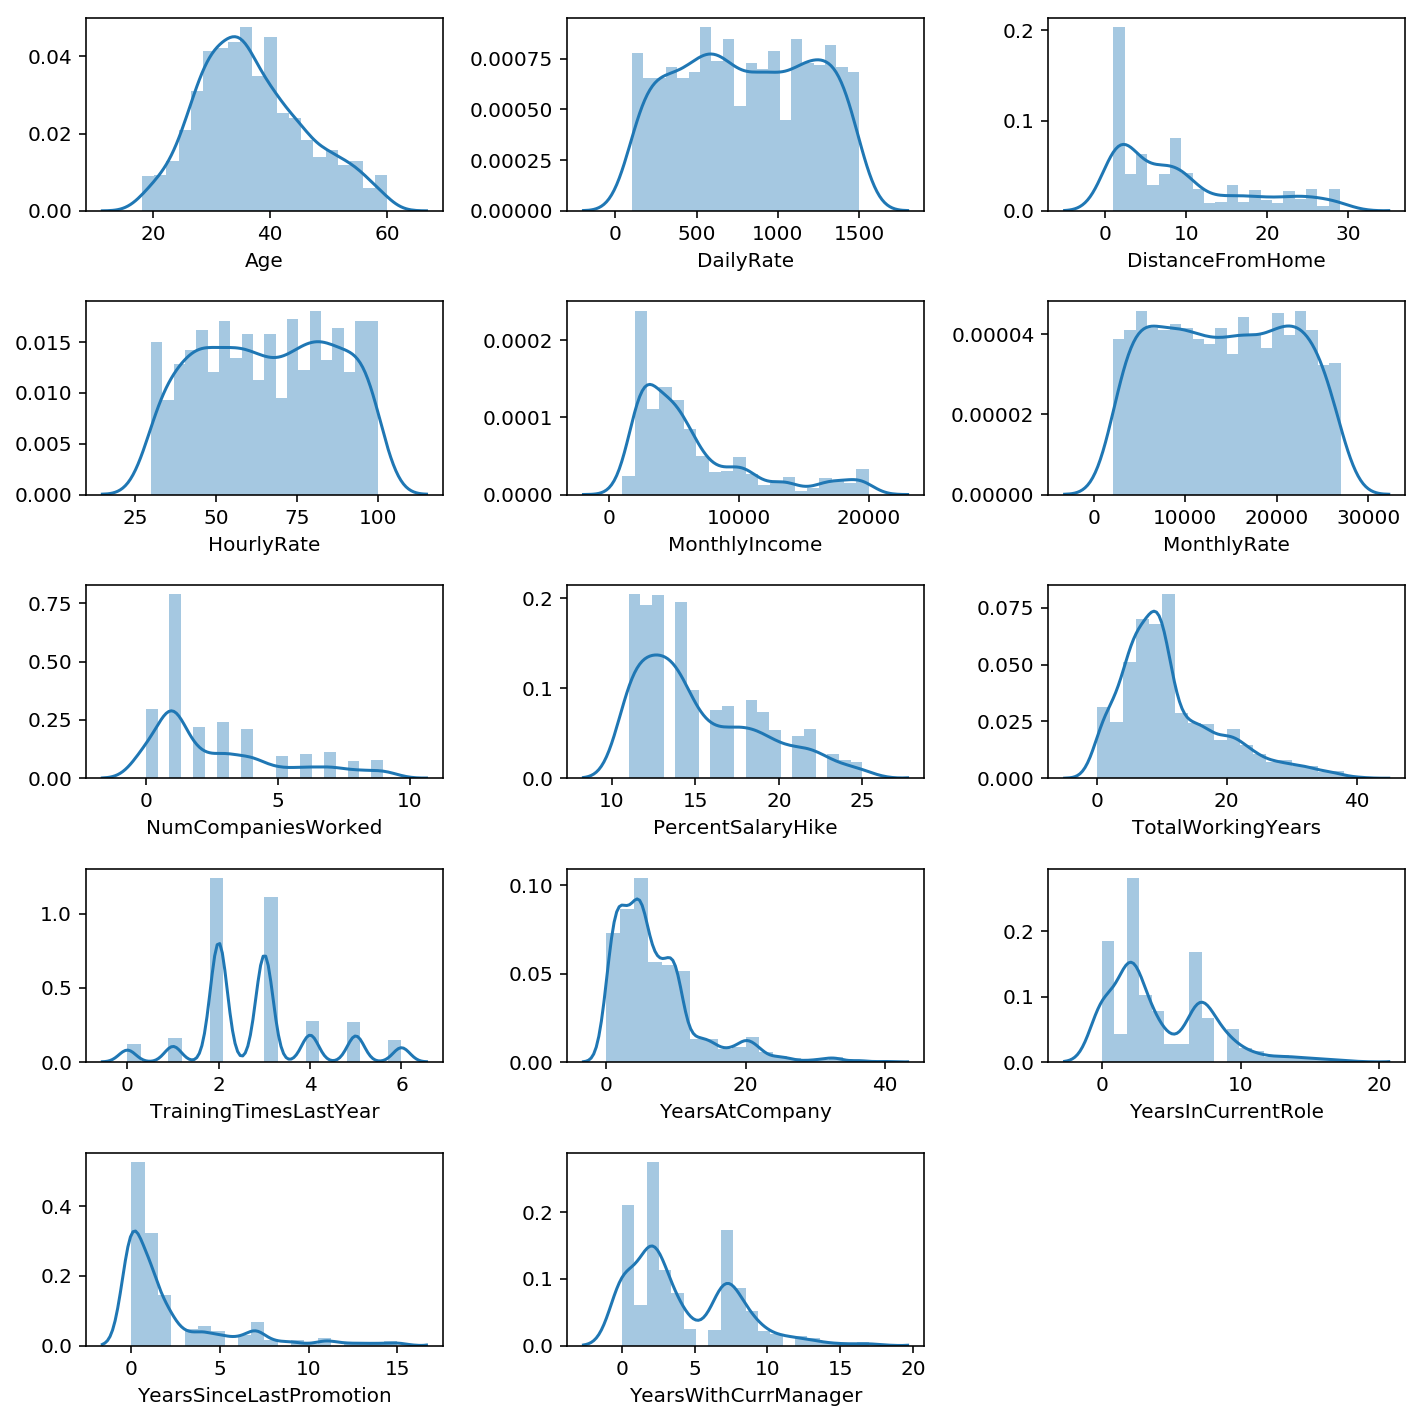

In [9]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_list, 1):
    plt.subplot(5, 3, i)
    sns.distplot(df[column], bins=20)
plt.tight_layout()
plt.savefig('figures/num_features_distribution.png', dpi=300)

#### Findings of Numerical Features

- Age: The age distribution of this data set distributed normally which cover from 20 to 60. Most employees are 30 to 40.
- DistanceFromHome: Most of employees live close to company which most distance are below 10km.
- MonthlyIncome: The majority of monthly income of employees are centred at around 5000. Only a few of people get high income over 10000.
- NumCompaniesWorked: Most employees only worked for one company.
- TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: These time type data are right skewed which most of people stay in company only for a few years.
- DailyRate, HourlyRate, MonthlyRate distributed uniformly which the figure is similar in different intervals.

### 2.2.2 Frequency Analysis of Categorical Features

Categorical features are: 'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole','JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel' and 'WorkLifeBalance'.

In [10]:
cate_list = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 
             'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
             'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'WorkLifeBalance']

Change the type of nominal features to object in order to process frequency analysis, because some classified variables were signed by integer in original data set.

In [11]:
for i in cate_list:
    df[i] = df[i].astype(object)

Browse the frequency of categorical features in data set.

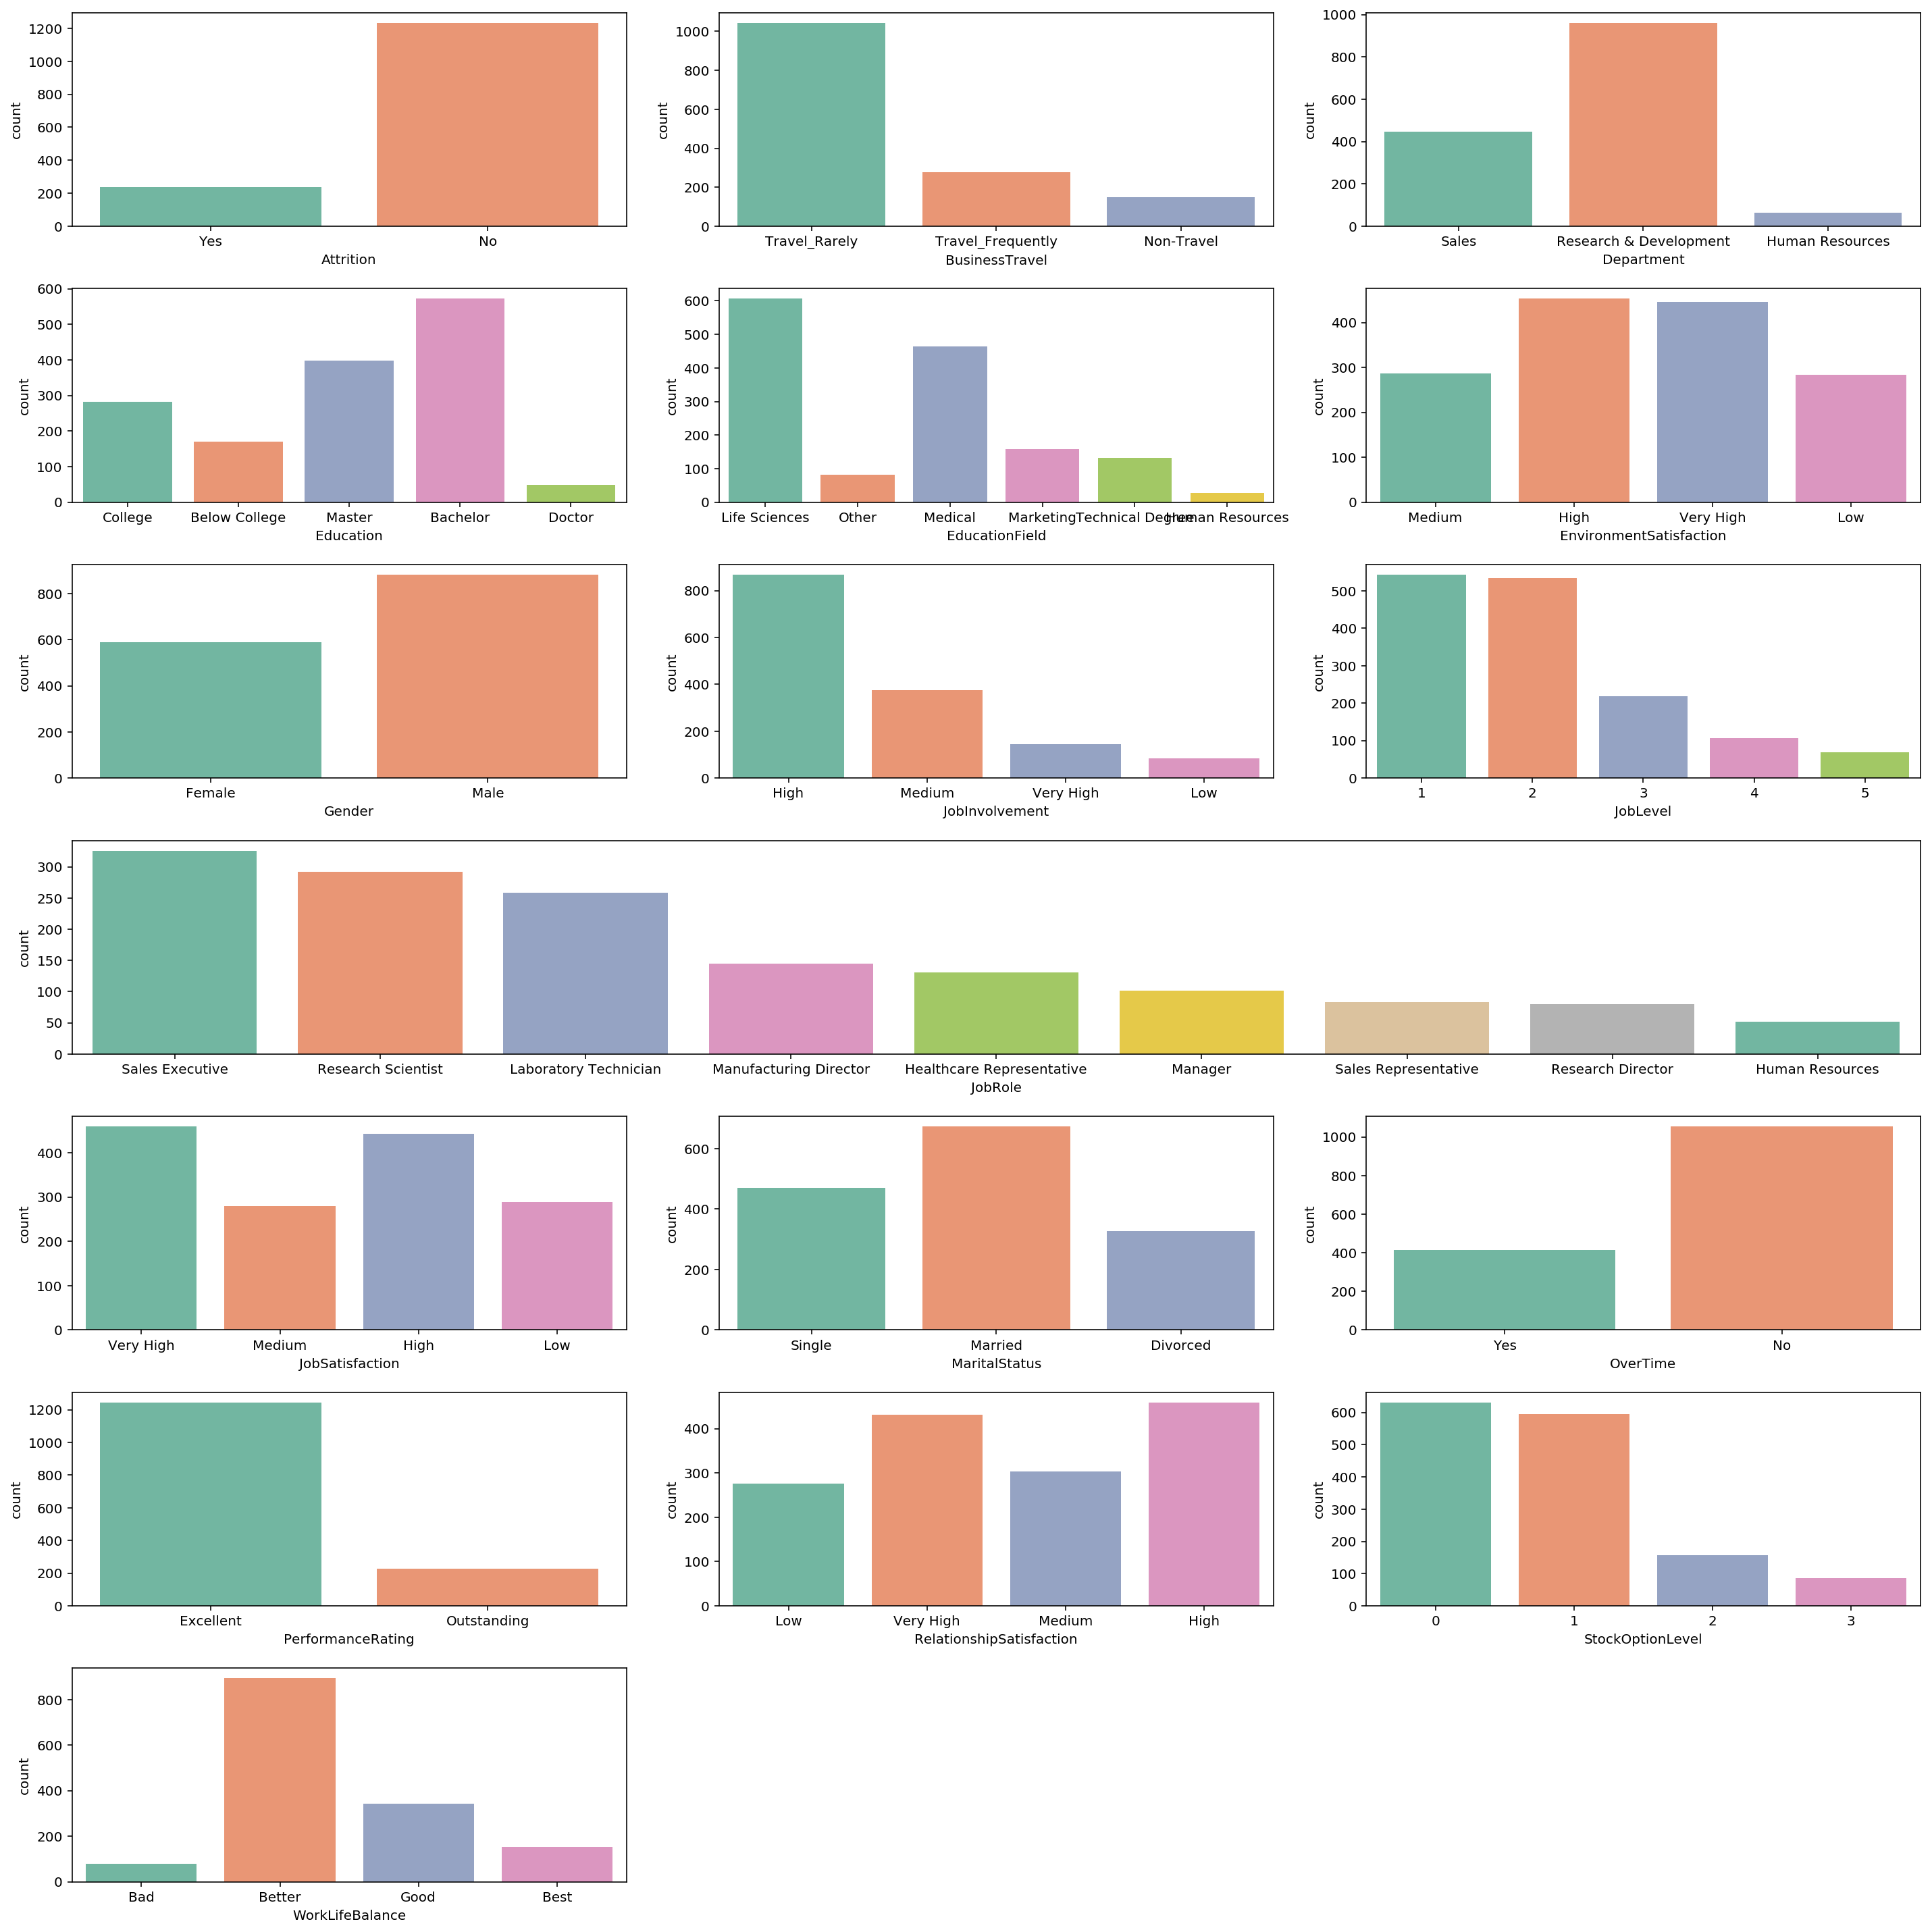

In [12]:
plt.figure(figsize=(20, 20))
gridspec.GridSpec(7, 3)
locator1, locator2 = [0, 0]
for column in cate_list:
    if column == 'JobRole':
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        sns.countplot(df[column], palette='Set2')
        locator1 += 1
        locator2 = 0
        continue
    plt.subplot2grid((7, 3), (locator1, locator2))
    sns.countplot(df[column], palette='Set2')
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break
plt.tight_layout()
plt.savefig('figures/cate_features_distribution.png', dpi=300)

#### Findings of Categorical Features

- In terms of satisfaction (enviroment, job and relationship satisfaction), most of employees are satisfied, which the number of "3" and "4" indicate high satisfaction are a lot.
- Most employees hold bachelor degree and many people major in life science.
- Since that most of employees are relative new to company, job level 1 is the majority job level.
- Job involment is pretty high among employees.

## 2.3 Correlation Analysis

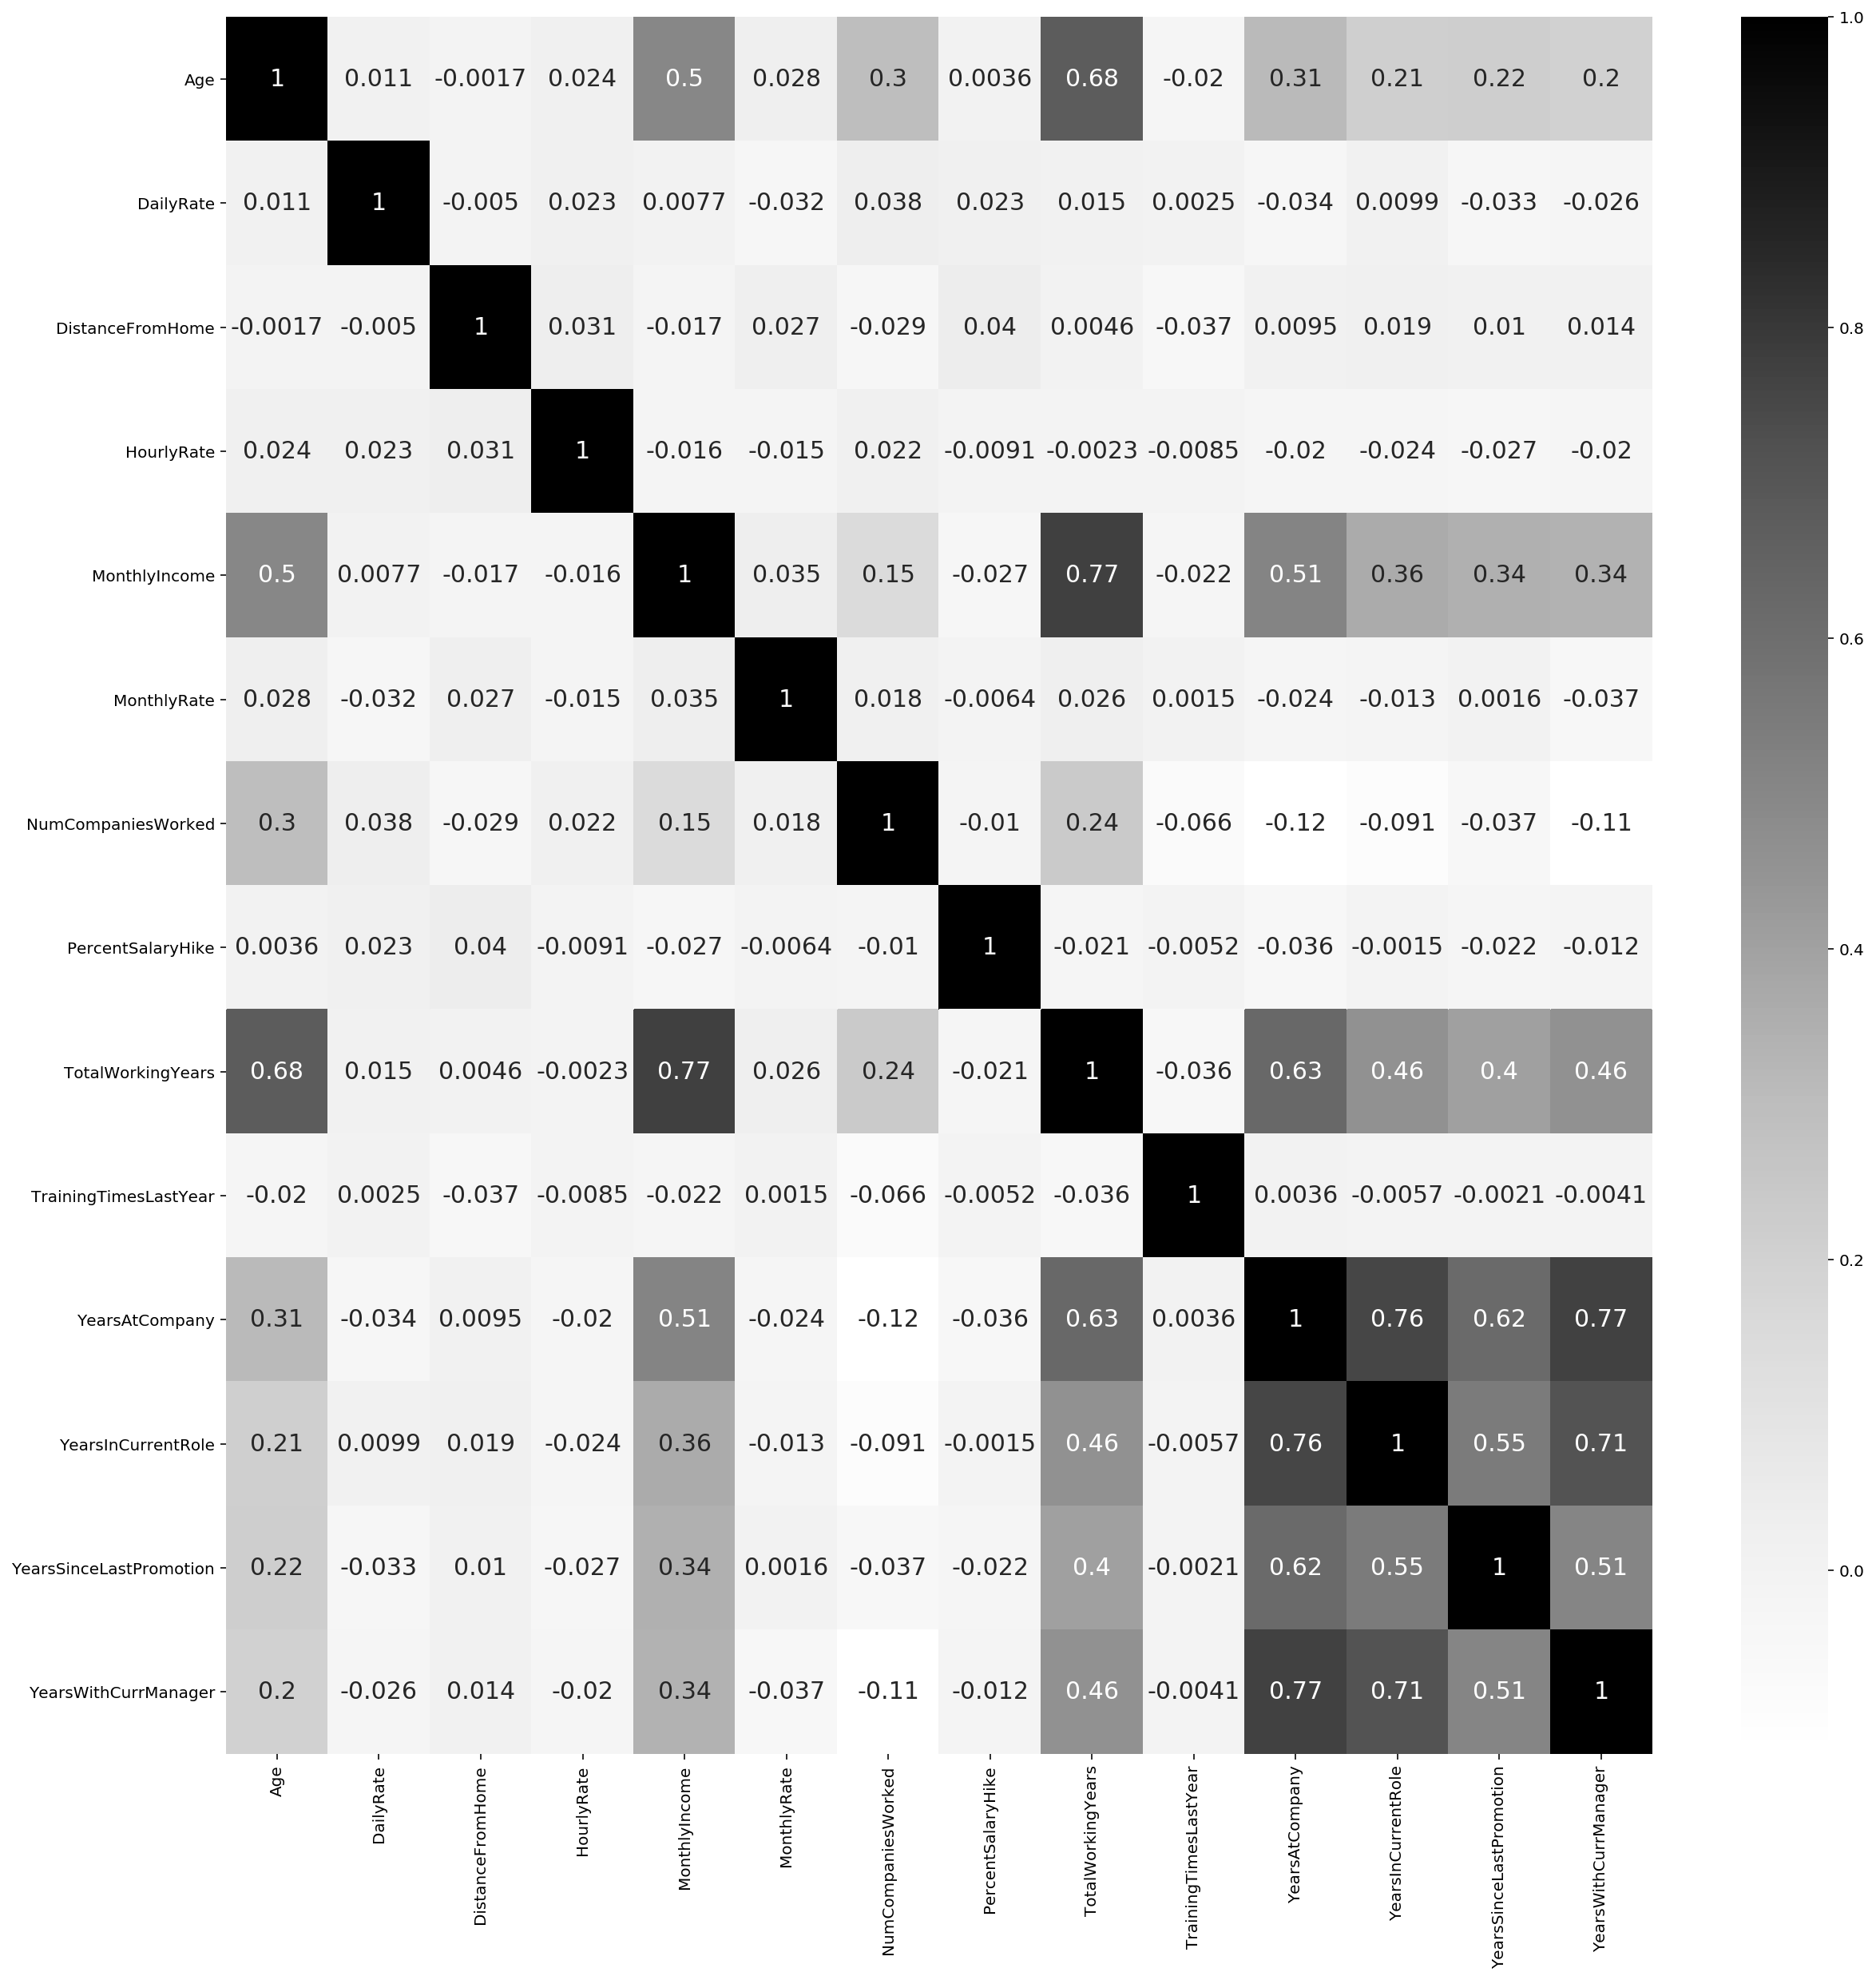

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="Greys", annot_kws={"size":15})
plt.savefig('figures/correlation.png', dpi=300)

#### Findings of Correlation Analysis

- Time type of features (Years at company, in current role, since last promotion and with current manager) are quite correlated to each other indicated by green zone.
- Besides, totle working year is also correlated to monthly income as we imagined.
- Most of features are not correlated to each other, so we do not have to deal with that. As for time type of features, we will consider that whether to alter them according to the machine learning model.  

## 2.4 Cross Analysis

### 2.4.1 Cross Analysis between Attrition and Numerical Features

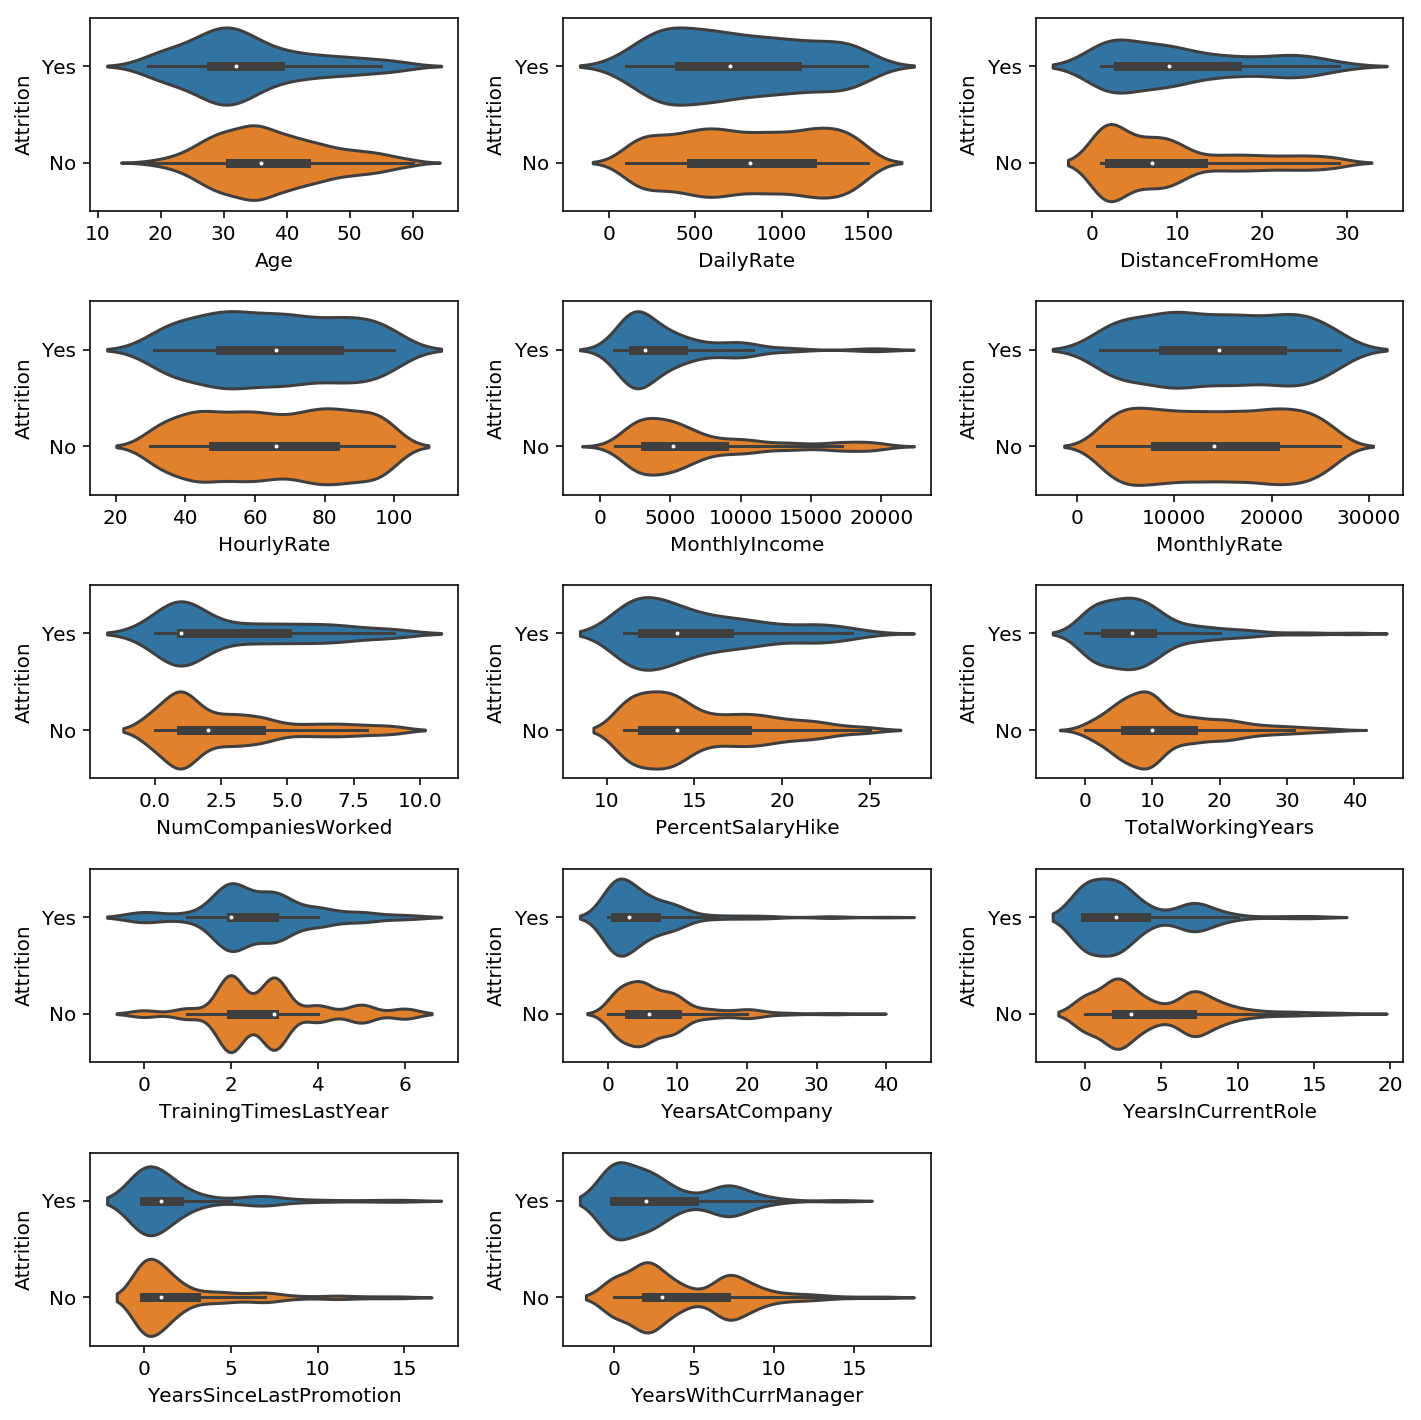

In [14]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_list, 1):
    plt.subplot(5, 3, i)
    sns.violinplot(data=df, x=column, y='Attrition')
plt.tight_layout()
plt.savefig('figures/num_features_cross.png', dpi=300)

#### Findings of Cross Analysis between Attrition and Numerical Features

> Above violin graph indicate the average value of features and similar information like boxplot. These findings are merely based on superficial results whithout consideration of confounding.

- Age: Younger employees are tend to leave compared to elder employees.
- DistanceFromHome: Those who live far from company have more possibility to leave.
- MonthlyIncome: Most income of attrition employee are below 5000 while those who's income is higher than 5000 tend to stay.
- NumCompaniesWorked, Time type of features: People who worked for many companies and worked for many years are likely to stay.


### 2.4.2 Cross Analysis between Attrition and Categorical Features

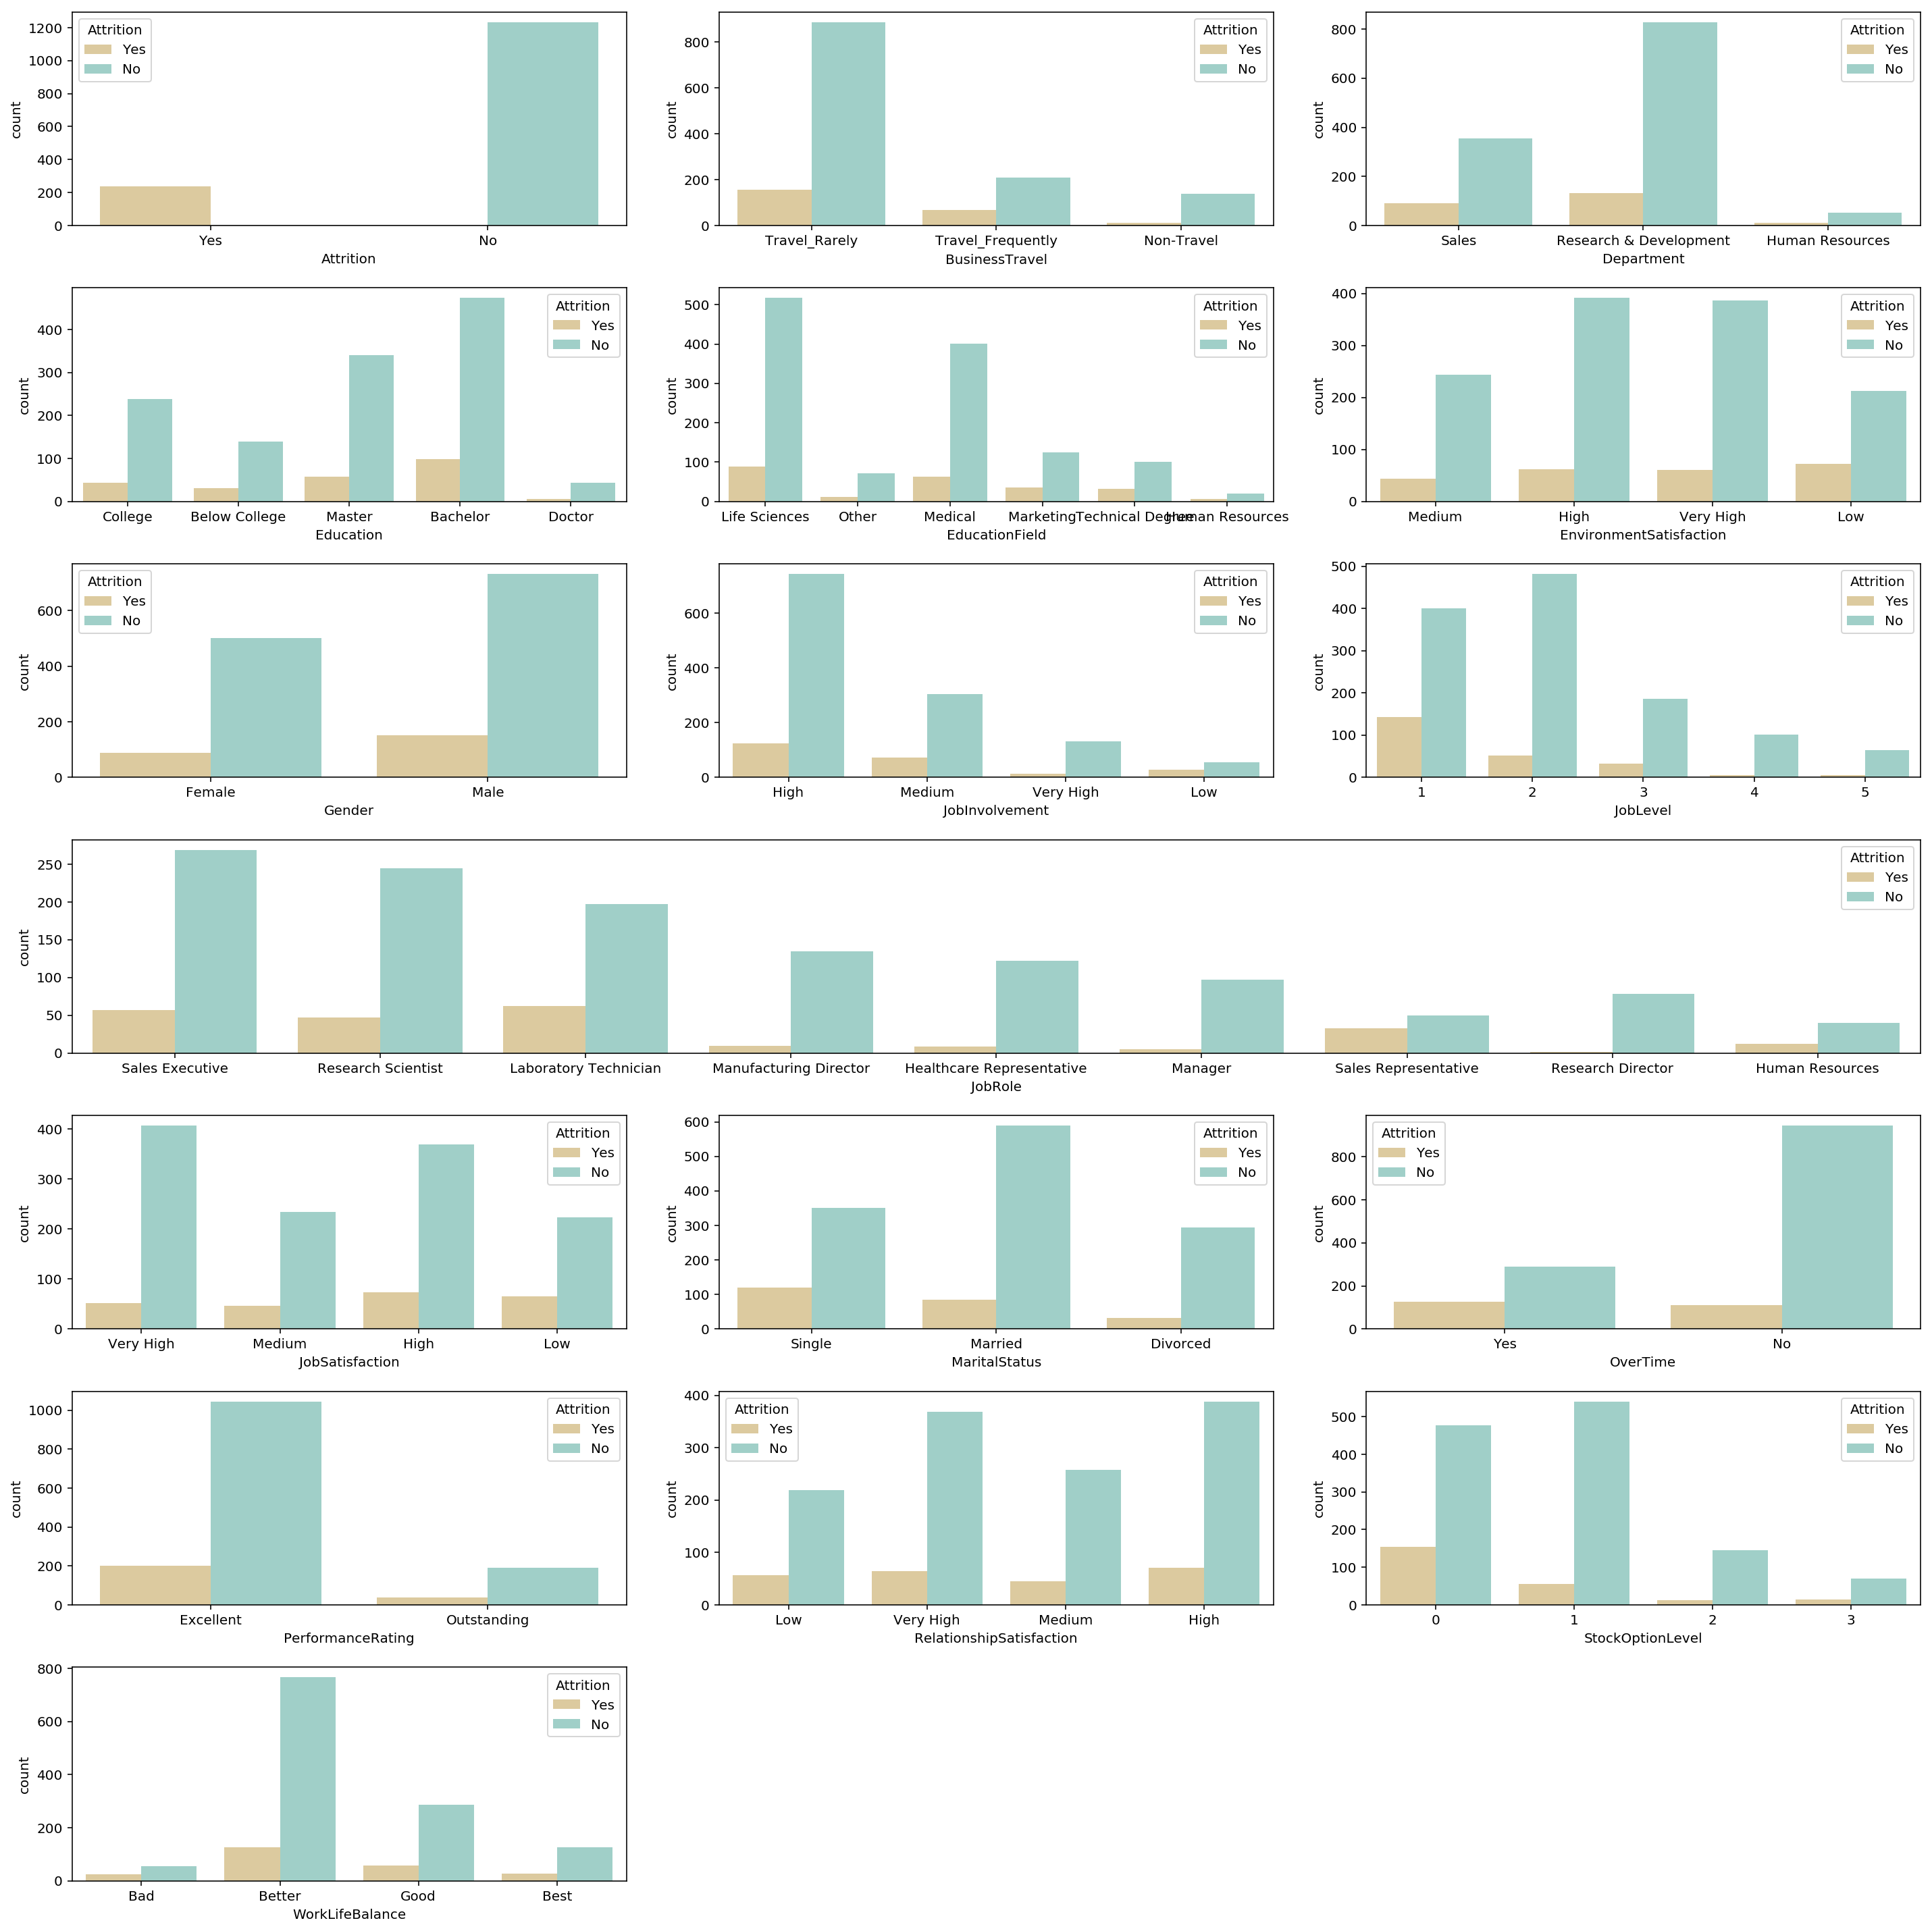

In [15]:
plt.figure(figsize=(20, 20))
gridspec.GridSpec(7, 3)
locator1, locator2 = [0, 0]
for column in cate_list:
    if column == 'JobRole':
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
        locator1 += 1
        locator2 = 0
        continue
    plt.subplot2grid((7, 3), (locator1, locator2))
    sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break
plt.tight_layout()
plt.savefig('figures/cate_features_cross.png', dpi=300)

#### Findings of Cross Analysis between Attrition and Categorical Features

> By comparing between different level among the employees attrition.

- Those who has business travel are more likely leave the company.
- Employees of Human Resource are the most stable group of employees.
- Employees who have Doctor degree are stable.
- Enviroment satisfaction is not related a lot to attrition.
- The higher job level is, the less possibility that employess leave.
- Technical employees are tend to leave.
- Low performance rating and low stock option level may result employees' attrition.

# 3. Preprocessing and Encoding of Features

After exploration of data, we need to process these features in order to apply them into machine learning models.

In [13]:
from sklearn import preprocessing
from IPython.display import Image
# Reload the data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'])

## 3.1 Preprocessing and Encoding of Categorical Features

### 3.1.1 Label all 'object' type of feature as 'integer'

In [14]:
for cate_features in df.select_dtypes(include='object').columns:
    le = preprocessing.LabelEncoder()
    df[cate_features] = le.fit_transform(df[cate_features])
    print("Origin Classes:", list(le.classes_))

Origin Classes: ['No', 'Yes']
Origin Classes: ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Origin Classes: ['Human Resources', 'Research & Development', 'Sales']
Origin Classes: ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Origin Classes: ['Female', 'Male']
Origin Classes: ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
Origin Classes: ['Divorced', 'Married', 'Single']
Origin Classes: ['No', 'Yes']


### 3.1.2 Dummy Nominal Features

Select those nominal features which have more than two class as dummy variables.

In [15]:
dummies = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(data=df, columns=dummies)

In [16]:
display(df.head())

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41          1               2       1102                 1          2   
1   49          0               1        279                 8          1   
2   37          1               2       1373                 2          2   
3   33          0               1       1392                 3          4   
4   27          0               2        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               3         2   
1                        3       1          61               2         2   
2                        4       1          92               2         1   
3                        4       0          56               3         1   
4                        1       1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0                4           5993        19479                   8         1   
1                2           5130        24907                   1         0   
2                3           2090         2396                   6         1   
3                3           2909        23159                   1         1   
4                2           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Department_0  Department_1  \
0                        0                     5             0             0   
1                        1                     7             0             1   
2                        0                     0             0             1   
3                        3                     0             0             1   
4                        2                     2             0             1   

   Department_2  EducationField_0  EducationField_1  EducationField_2  \
0             1                 0                 1                 0   
1             0                 0                 1                 0   
2             0                 0                 0                 0   
3             0                 0                 1                 0   
4             0                 0                 0                 0   

   EducationField_3  EducationField_4  EducationField_5  JobRole_0  JobRole_1  \
0                 0                 0                 0          0          0   
1                 0                 0                 0          0          0   
2                 0                 1                 0          0          0   
3                 0                 0                 0          0          0   
4                 1                 0                 0          0          0   

   JobRole_2  JobRole_3  JobRole_4  JobR

## 3.2 Preprocessing and Encoding of Numerical Features

### 3.2.1 Scaling Numerical Features

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

$$Z=\frac{X-\mu}{S}$$

In [17]:
std = preprocessing.StandardScaler()
scaled = std.fit_transform(df[numerical_list])
scaled = pd.DataFrame(scaled, columns=numerical_list)
for i in numerical_list:
    df[i] = scaled[i]

In [18]:
display(df.head())

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  \
0  0.446350          1               2   0.742527         -1.010909   
1  1.322365          0               1  -1.297775         -0.147150   
2  0.008343          1               2   1.414363         -0.887515   
3 -0.429664          0               1   1.461466         -0.764121   
4 -1.086676          0               2  -0.524295         -0.887515   

   Education  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0          2                        2       0    1.383138               3   
1          1                        3       1   -0.240677               2   
2          2                        4       1    1.284725               2   
3          4                        4       0   -0.486709               3   
4          1                        1       1   -1.274014               3   

   JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0         2                4      -0.108350     0.726020            2.125136   
1         2                2      -0.291719     1.488876           -0.678049   
2         1                3      -0.937654    -1.674841            1.324226   
3         1                3      -0.763634     1.243211           -0.678049   
4         1                2      -0.644858     0.325900            2.525591   

   OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0         1          -1.150554                  3                         1   
1         0           2.129306                  4                         4   
2         1          -0.057267                  3                         2   
3         1          -1.150554                  3                         3   
4         0          -0.877232                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0          -0.421642              -2.171982   
1                 1          -0.164511               0.155707   
2                 0          -0.550208               0.155707   
3                 0          -0.421642               0.155707   
4                 1          -0.678774               0.155707   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1       -0.164613           -0.063296   
1                3        0.488508            0.764998   
2                3       -1.144294           -1.167687   
3                3        0.161947            0.764998   
4                3       -0.817734           -0.615492   

   YearsSinceLastPromotion  YearsWithCurrManager  Department_0  Department_1  \
0                -0.679146              0.245834             0             0   
1                -0.368715              0.806541             0             1   
2                -0.679146             -1.155935             0             1   
3                 0.252146             -1.155935             0             1   
4                -0.058285             -0.595227             0             1   

   Department_2  EducationField_0  EducationField_1  EducationField_2  \
0             1                 0                 1                 0   
1             0                 0                 1                 0   
2             0                 0                 0                 0   
3             0                 0                 1                 0   
4             0                 0                 0                 0   

   EducationField_3  EducationField_4  EducationField_5  JobRole_0  JobRole_1  \
0                 0                 0                 0          0          0   
1                 0                 0                 0          0          0   
2                 0                 1                 0          0          0   
3                 0                 0                 0          0          0   
4                 1                 0                 0          0          0   

   JobRole_2  J

# 4. Model Selection

After dummy process and standardized numerical feature. We split the data set into training set and test set with ratio 8:2. Then, duplicate the training set to:
- Type1: original size of training set; 
- Type2: Oversampled size of training set. Decide to use which version of training set by comparing the performance of each one after implementing a machine learning model.

Moreover, this report used Grid search which is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified. First, choose some of classifying machine learning model as candidates. We put a customized list of parameters into grid to search out an optimized model under cv equals to 5. Then apply this trained model to test set. Evaluate the performance and compare them between different models.

<img src="figures/flow.png">

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from subprocess import call
from IPython.display import Image 
from imblearn.over_sampling import SMOTE

Define a function to output the confusion matrix after building the model.

In [11]:
def my_confusion_matrix(test, test_pred):
    cf = pd.DataFrame(confusion_matrix(test, test_pred), 
                      columns=['Predicted NO', 'Predicted Yes'], 
                      index=['True No', 'True Yes'])
    report = pd.DataFrame(classification_report(test, test_pred, target_names=['No', 'Yes'], 
                                                        output_dict=True)).round(2).transpose()
    display(cf)
    display(report)

Define a funciton to draw ROC curve to illustrate the AUC.

In [37]:
def plot_roc_curve(model, y, x):
    tree_auc = roc_auc_score(y, model.predict(x))
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % tree_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.fill_between(fpr, tpr, color='orange', alpha=0.2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

Splite the data set into traning set and test set with ratio 8:2
- Duplicate the training set which:
    - Original size of training set
    - Oversampled size of training set

Decide to use which version of training set before implementing a machine learning model.

In [19]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)
oversampler = SMOTE(random_state=0)
smote_X_train, smote_y_train = oversampler.fit_sample(X_train, y_train)

After oversampling, the scale of data set changed to following.

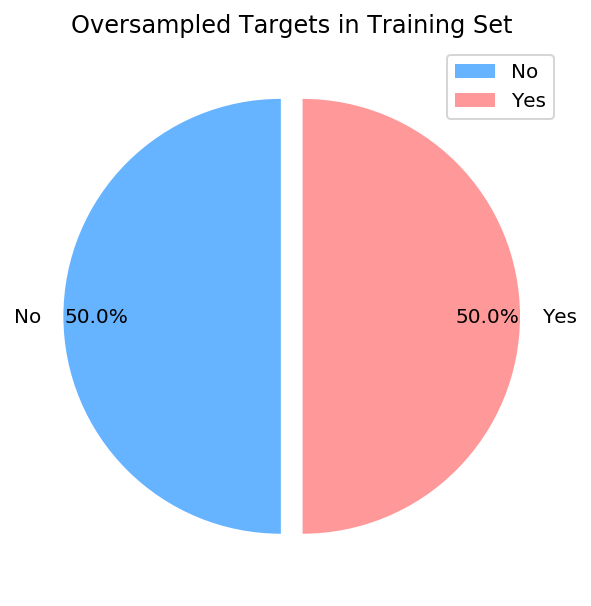

In [469]:
colors = ['#66b3ff', '#ff9999']
explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
plt.pie(smote_y_train.value_counts(), colors = colors, labels=['No', 'Yes'], 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.legend()
plt.title("Oversampled Targets in Training Set")
plt.savefig('figures/oversample_distribution.png', dpi=300)

## 4.1 Decision Tree

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### 4.1.1 Decision Tree

In [24]:
params = {"criterion": ("gini", "entropy"), 
          "splitter": ("best", "random"), 
          "max_depth": np.arange(1, 20), 
          "min_samples_split": [1, 2, 3, 4], 
          "min_samples_leaf": np.arange(1, 20)}
tree1_grid = GridSearchCV(DecisionTreeClassifier(random_state=65), params, scoring="roc_auc", n_jobs=-1, cv=5)
tree1_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=65,
                                              splitter='best'),
             iid='depr...ed', n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                        

#### Optimized Model 

In [26]:
print(tree1_grid.best_score_)
print(tree1_grid.best_params_)
print(tree1_grid.best_estimator_)

0.7540115908670544
{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'random'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=65, splitter='random')


#### Tree Graph

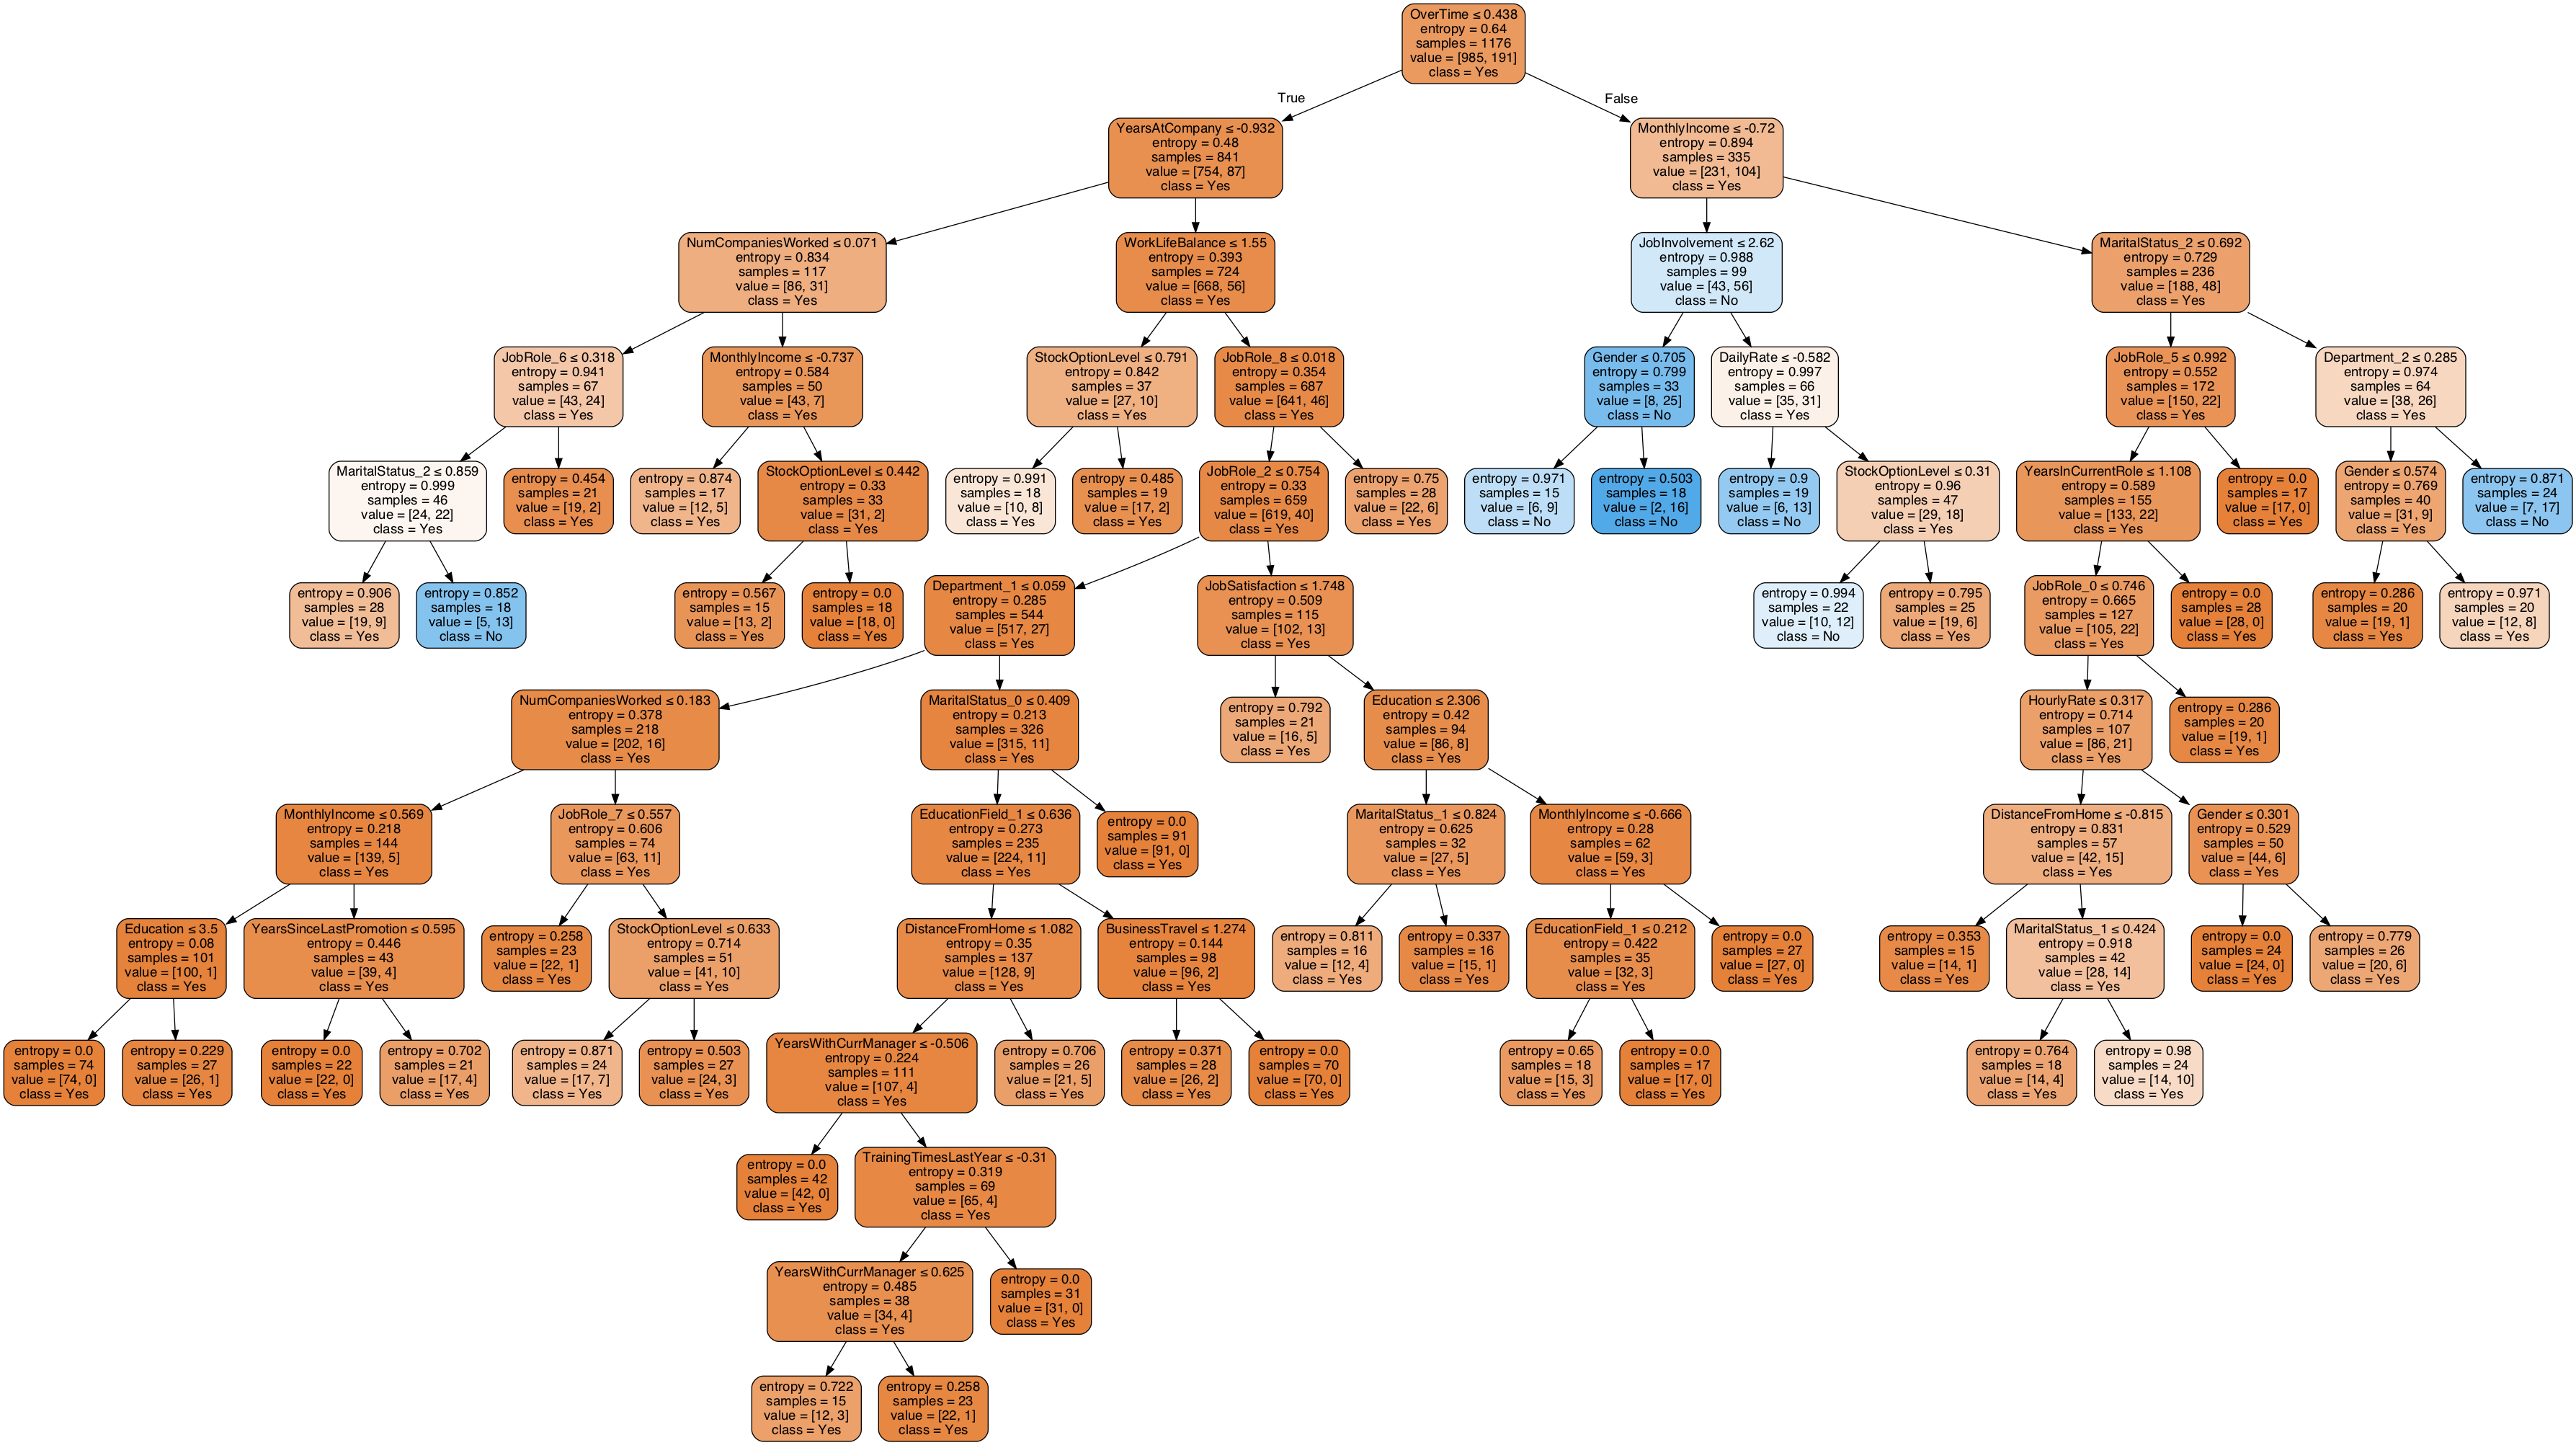

In [27]:
tree1_clf = DecisionTreeClassifier(random_state=65, **tree1_grid.best_params_)
tree1_clf.fit(X_train, y_train)
tree.export_graphviz(tree1_clf, out_file='tree.dot', special_characters=True, rounded = True, filled= True,
                     feature_names=X.columns, class_names=['Yes', 'No'])
call(['dot', '-T', 'png', 'tree.dot', '-o', 'figures/tree1.png'])
display(Image("figures/tree1.png", height=2000, width=1900))

#### Importance of Features

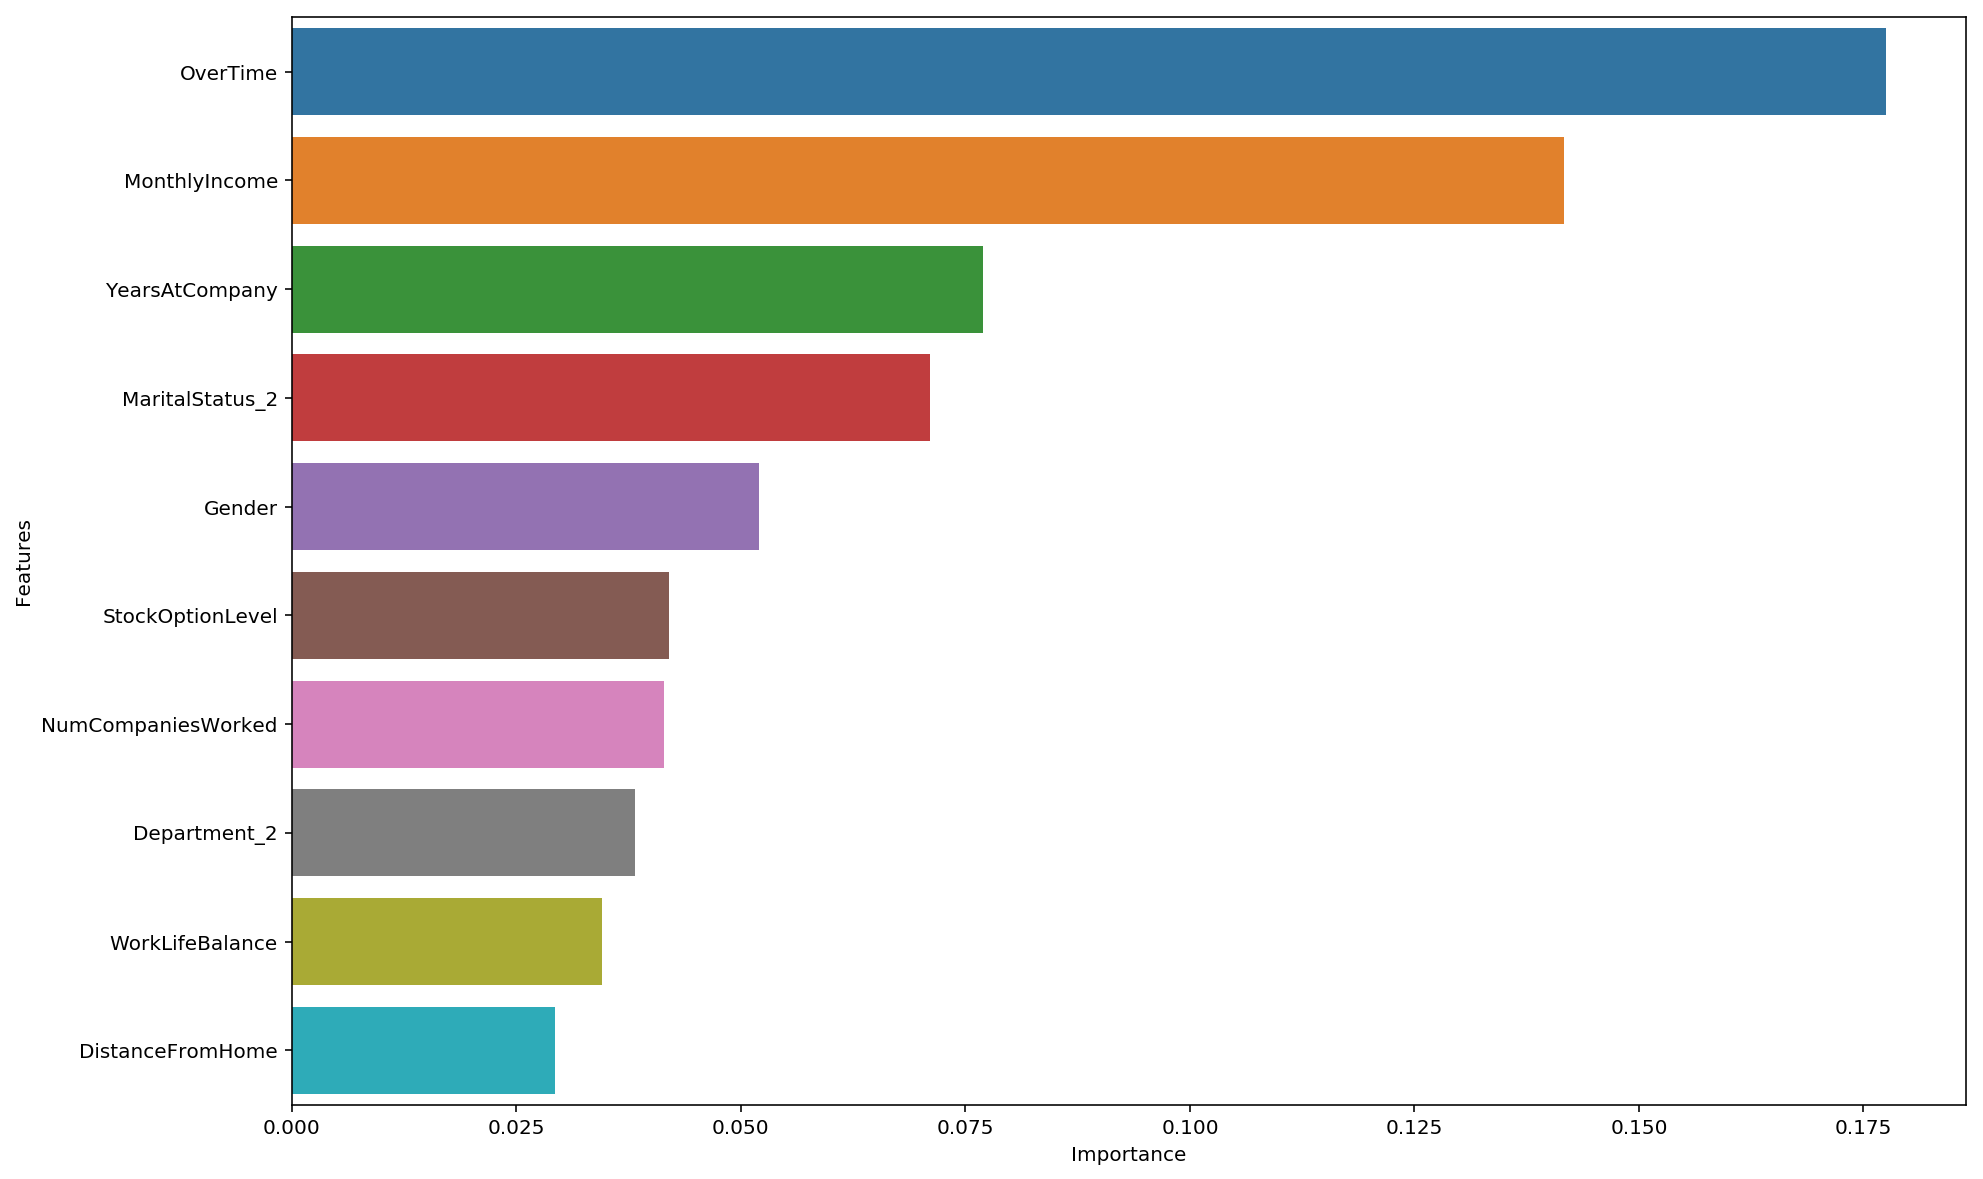

In [43]:
IP = pd.DataFrame({"Features": np.array(X.columns), "Importance": tree1_clf.feature_importances_})
IP = IP.sort_values(by=['Importance'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Features', data=IP[:10])
plt.savefig('figures/tree1_importance.png', dpi=300)

#### Results of Test Set

In [35]:
y_test_pred_tree1 = tree1_clf.predict(X_test)
my_confusion_matrix(y_test, y_test_pred) # Defined before
tree1_auc = roc_auc_score(y_test, y_test_pred_tree1)
print("AUC:", tree1_auc)

Predicted NO  Predicted Yes
True No            231             17
True Yes            31             15

f1-score  precision  recall  support
No                0.91       0.88    0.93   248.00
Yes               0.38       0.47    0.33    46.00
accuracy          0.84       0.84    0.84     0.84
macro avg         0.65       0.68    0.63   294.00
weighted avg      0.82       0.82    0.84   294.00

AUC: 0.6287692847124825


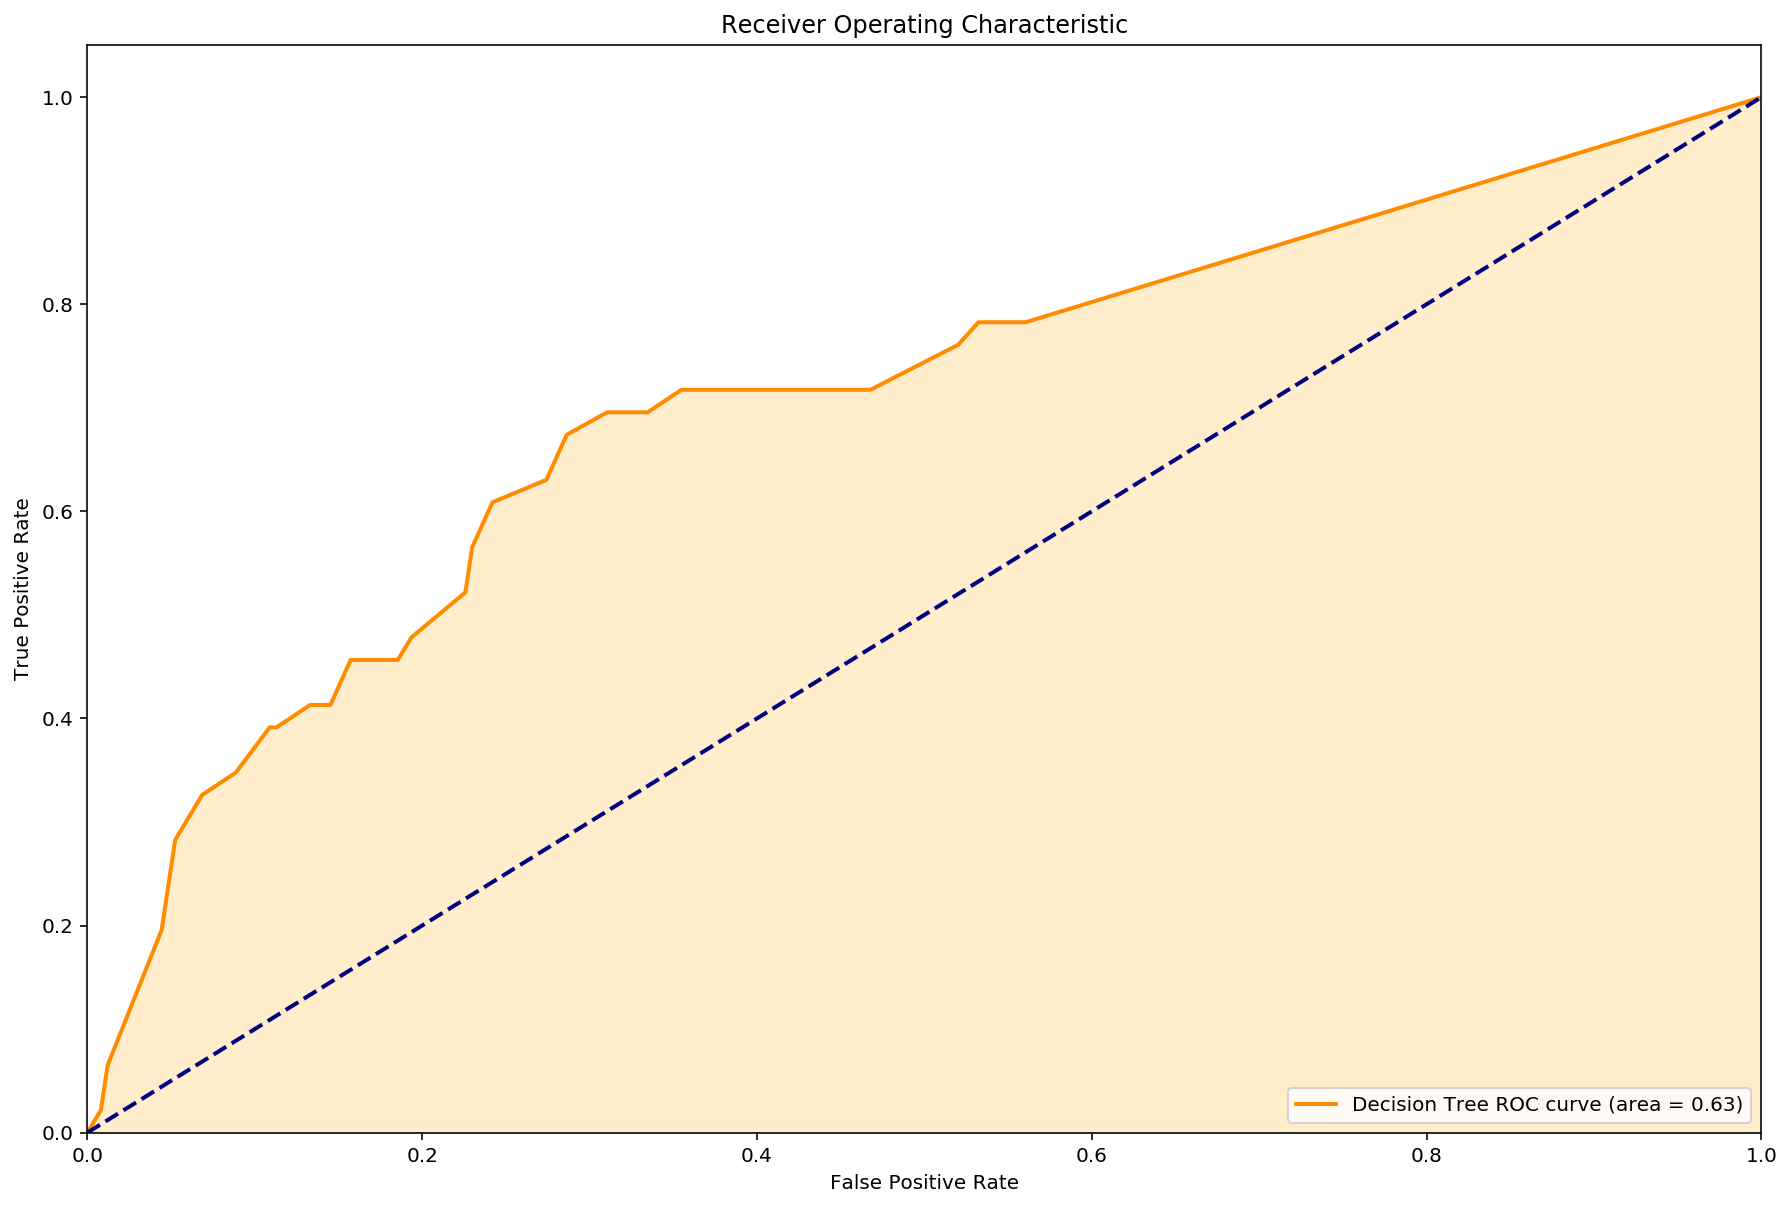

In [38]:
plot_roc_curve(tree1_clf, y_test, X_test)
plt.savefig('figures/tree1_roc.png', dpi=300)

### 4.1.2 Decision Tree (Oversample)

In [47]:
tree2_grid = GridSearchCV(DecisionTreeClassifier(random_state=65), params, scoring="roc_auc", n_jobs=-1, cv=5)
tree2_grid.fit(smote_X_train, smote_y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=65,
                                              splitter='best'),
             iid='depr...ed', n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                        

#### Optimized Model 

In [48]:
print(tree2_grid.best_score_)
print(tree2_grid.best_params_)
print(tree2_grid.best_estimator_)

0.9063258522507665
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=65, splitter='random')


#### Results of Test Set

In [51]:
tree2_clf = DecisionTreeClassifier(random_state=65, **tree2_grid.best_params_)
tree2_clf.fit(smote_X_train, smote_y_train)
y_test_pred_tree2 = tree2_clf.predict(X_test)
my_confusion_matrix(y_test, y_test_pred)
tree2_auc = roc_auc_score(y_test, y_test_pred_tree2)
print("AUC:", tree2_auc)

Predicted NO  Predicted Yes
True No            231             17
True Yes            31             15

f1-score  precision  recall  support
No                0.91       0.88    0.93   248.00
Yes               0.38       0.47    0.33    46.00
accuracy          0.84       0.84    0.84     0.84
macro avg         0.65       0.68    0.63   294.00
weighted avg      0.82       0.82    0.84   294.00

AUC: 0.5747720897615708


#### ROC Curve

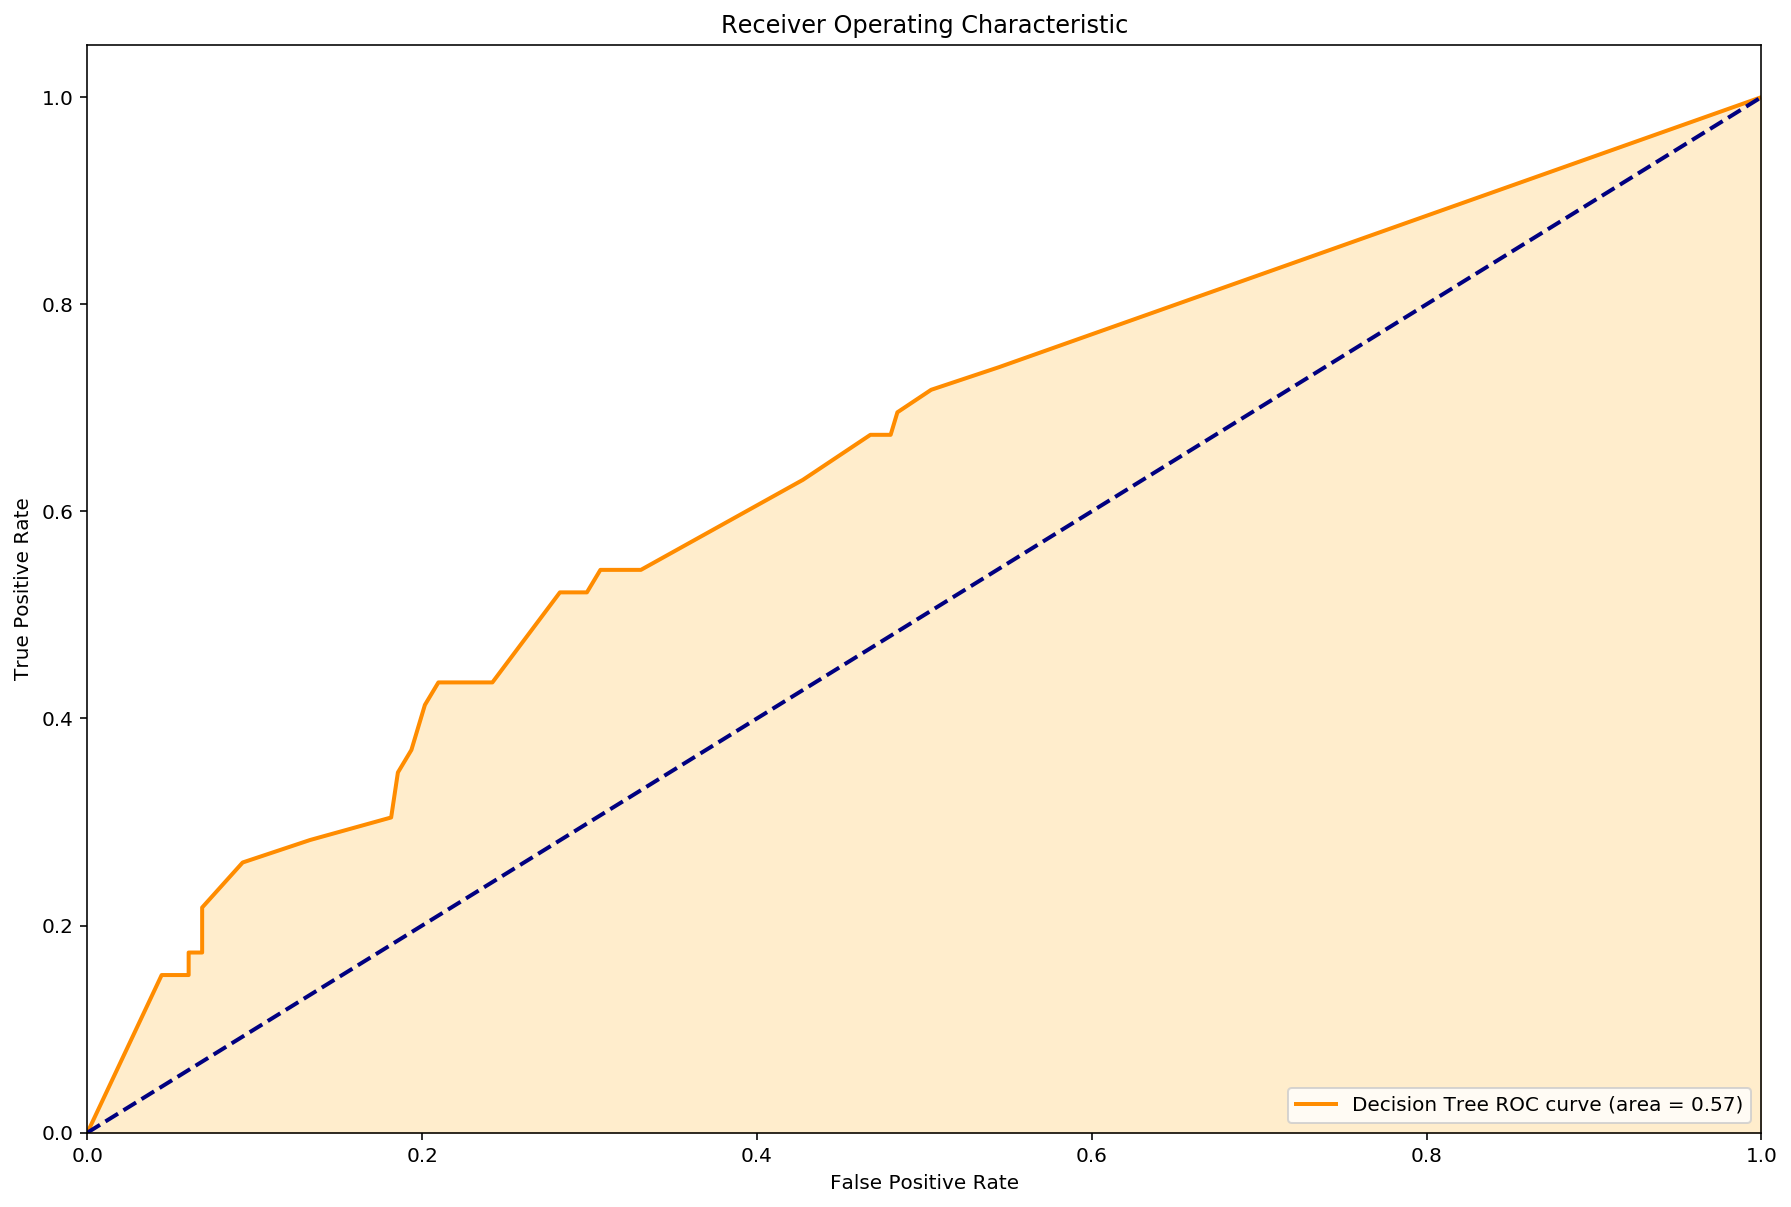

In [52]:
plot_roc_curve(tree2_clf, y_test, X_test)
plt.savefig('figures/tree_roc.png', dpi=300)

#### Importance of Features

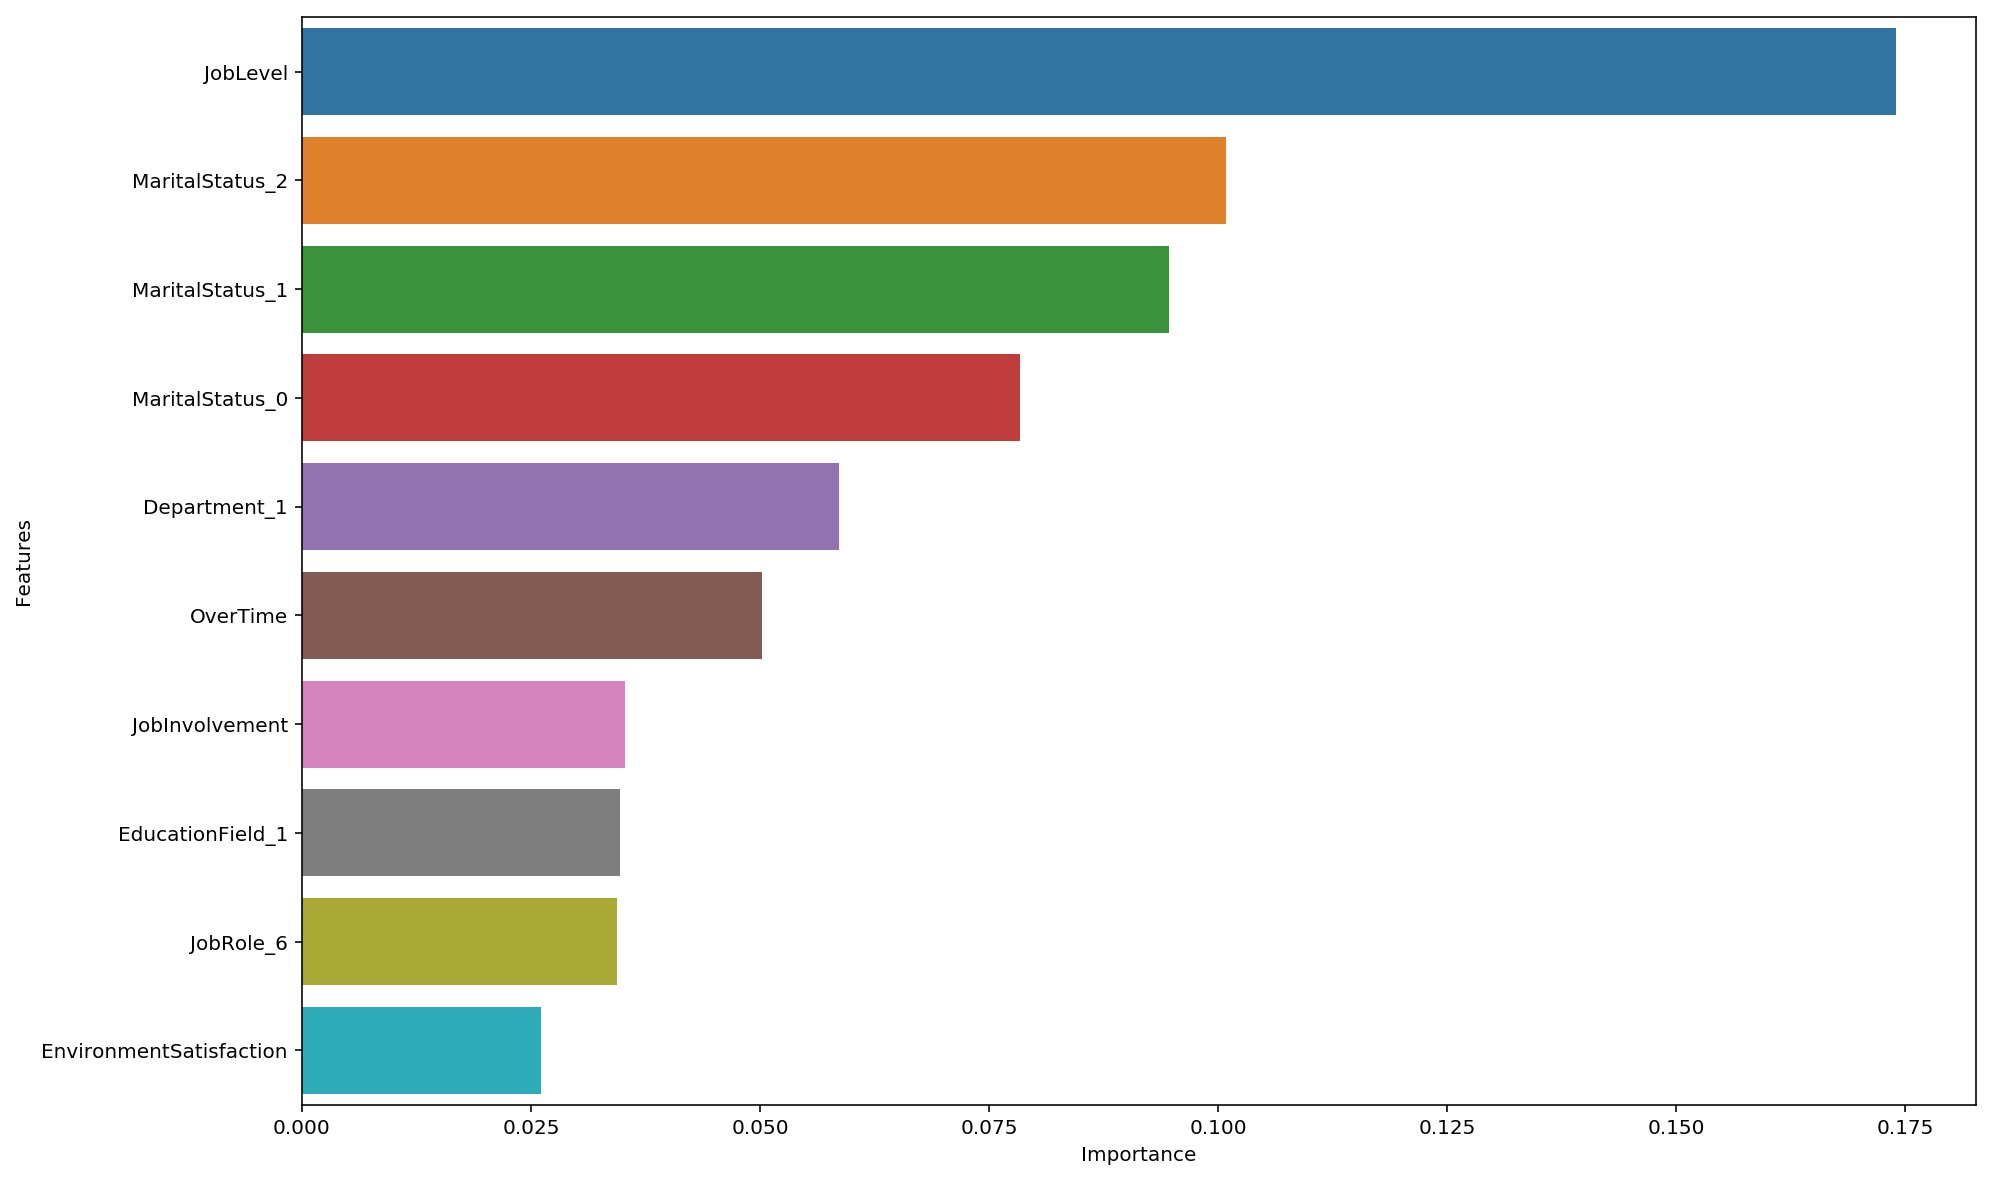

In [50]:
IP = pd.DataFrame({"Features": np.array(X.columns), "Importance": tree2_clf.feature_importances_})
IP = IP.sort_values(by=['Importance'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Features', data=IP[:10])
plt.savefig('figures/tree2_importance.png', dpi=300)

#### Tree Graph

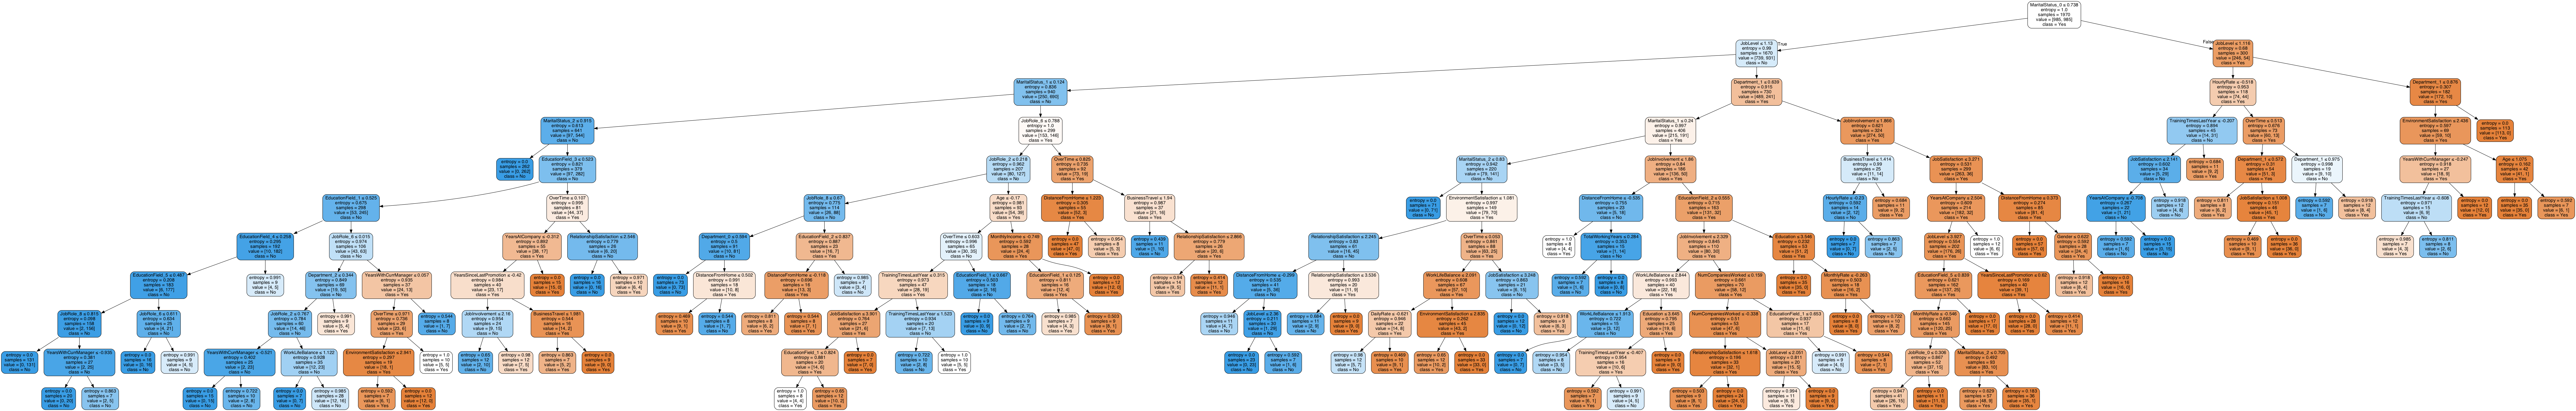

In [49]:
tree.export_graphviz(tree2_clf, out_file='tree.dot', special_characters=True, rounded = True, filled= True,
                     feature_names=X.columns, class_names=['Yes', 'No'])
call(['dot', '-T', 'png', 'tree.dot', '-o', 'figures/tree2.png'])
display(Image("figures/tree2.png", height=2000, width=1900))

## 4.2 SVM

### 4.2.1 SVM Linear Model

In [53]:
from sklearn.svm import SVC

In [55]:
svm_model = SVC(kernel='linear', gamma='auto', C=1, probability=True)
parameters = {'kernel':('linear',), 'C':[0.1,0.2,0.5,1,2,3]}
svm_gridlin = GridSearchCV(svm_model, parameters, cv=5,n_jobs=-1, scoring="recall")
svm_gridlin.fit(X_train, y_train)
y_test_pred = svm_gridlin.predict(X_test)
print(svm_gridlin.best_params_)
my_confusion_matrix(y_test, y_test_pred)
svm_l_auc = roc_auc_score(y_test, y_test_pred)
print("AUC:", svm_l_auc)

{'C': 3, 'kernel': 'linear'}


Predicted NO  Predicted Yes
True No            240              8
True Yes            27             19

f1-score  precision  recall  support
No                0.93       0.90    0.97   248.00
Yes               0.52       0.70    0.41    46.00
accuracy          0.88       0.88    0.88     0.88
macro avg         0.73       0.80    0.69   294.00
weighted avg      0.87       0.87    0.88   294.00

AUC: 0.6903927068723703


In [56]:
print(tree2_grid.best_score_)
print(tree2_grid.best_params_)
print(tree2_grid.best_estimator_)

0.9063258522507665
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=65, splitter='random')


In [57]:
tree2_clf = DecisionTreeClassifier(random_state=65, **tree2_grid.best_params_)
tree2_clf.fit(smote_X_train, smote_y_train)
y_test_pred_tree2 = tree2_clf.predict(X_test)
my_confusion_matrix(y_test, y_test_pred)
tree2_auc = roc_auc_score(y_test, y_test_pred_tree2)
print("AUC:", tree2_auc)

Predicted NO  Predicted Yes
True No            240              8
True Yes            27             19

f1-score  precision  recall  support
No                0.93       0.90    0.97   248.00
Yes               0.52       0.70    0.41    46.00
accuracy          0.88       0.88    0.88     0.88
macro avg         0.73       0.80    0.69   294.00
weighted avg      0.87       0.87    0.88   294.00

AUC: 0.5747720897615708


In [58]:
svm_linear = SVC(**svm_gridlin.best_params_, probability=True)
svm_linear.fit(X_train, y_train)
svm_linear_auc = roc_auc_score(y_test, y_test_pred)

### 4.2.2 SVM Non-Linear Model

In [59]:
svm_rbf = SVC(kernel='rbf', gamma=0.01, C=1, probability=True)
paramrbf = {'kernel':('rbf','poly'), 'gamma':[0.015,0.02,0.03,0.04]}
svm_gridrbf = GridSearchCV(svm_rbf, paramrbf, cv=5,n_jobs=-1,scoring="recall")
svm_gridrbf.fit(X_train, y_train)
y_train_pred = svm_gridrbf.predict(X_train)
y_test_pred = svm_gridrbf.predict(X_test)
# print(f"========Train data============ :\nclassification_report \n")
# my_confusion_matrix(y_train, y_train_pred)
print(svm_gridrbf.best_params_)
print(f"=========test data============ :\nclassification_report\n")
my_confusion_matrix(y_test, y_test_pred)
svm_nl_auc = roc_auc_score(y_test, y_test_pred)
print("AUC:", svm_nl_auc)

{'gamma': 0.03, 'kernel': 'poly'}
=========test data============ :
classification_report



Predicted NO  Predicted Yes
True No            234             14
True Yes            28             18

f1-score  precision  recall  support
No                0.92       0.89    0.94   248.00
Yes               0.46       0.56    0.39    46.00
accuracy          0.86       0.86    0.86     0.86
macro avg         0.69       0.73    0.67   294.00
weighted avg      0.85       0.84    0.86   294.00

AUC: 0.6674263674614306


In [397]:
svm_nonlinear = SVC(**svm_gridrbf.best_params_, probability=True)
svm_nonlinear.fit(X_train, y_train)
svm_nonlinear_auc = roc_auc_score(y_test, y_test_pred)

### 4.2.3 SVM Linear Model (Oversample)

In [448]:
oversampler=SMOTE(random_state=65)
smote_xtrain, smote_ytrain = oversampler.fit_sample(X_train,y_train)

In [449]:
svm_smote = SVC(kernel='linear', gamma='auto', C=0.01)
paramsmote = {'kernel':('linear',), 'C':[0.1,0.2,0.5,1,2,3]}
svm_gridsmote = GridSearchCV(svm_smote, paramsmote, cv=5,n_jobs=-1,scoring="recall")
svm_gridsmote.fit(smote_xtrain, smote_ytrain)
y_train_pred_smote = svm_gridsmote.predict(smote_xtrain)
y_test_pred_smote = svm_gridsmote.predict(X_test)

print(svm_gridsmote.best_params_)
print(f"=========test data============ :\nclassification_report\n")
my_confusion_matrix(y_test, y_test_pred_smote)
svm_sl_auc = roc_auc_score(y_test, y_test_pred_smote)
print("AUC:", svm_sl_auc)

{'C': 3, 'kernel': 'linear'}
=========test data============ :
classification_report



Predicted NO  Predicted Yes
True No            234             14
True Yes            24             22

f1-score  precision  recall  support
No                0.92       0.91    0.94   248.00
Yes               0.54       0.61    0.48    46.00
accuracy          0.87       0.87    0.87     0.87
macro avg         0.73       0.76    0.71   294.00
weighted avg      0.86       0.86    0.87   294.00

AUC: 0.7109046283309958


we found that compared to the result without using smote,the accuracy is a little smaller(61% and 70%),while the rate of recall for 'YES',is higher(48% and 41%),the auc is also higher(0.71 and 0.69)

In [450]:
svm_linear_smote = SVC(**svm_gridsmote.best_params_, probability=True)
svm_linear_smote.fit(X_train, y_train)
svm_linear_smote_auc = roc_auc_score(y_test, y_test_pred_smote)

### 4.2.4 SVM Non-Linear Model (Oversample)

In [451]:
svm_rbf = SVC(kernel='rbf', gamma=0.01, C=1)
paramrbf = {'kernel':('rbf','poly'), 'gamma':[0.015,0.02,0.03,0.04]}
svm_gridrbfsmo = GridSearchCV(svm_rbf, paramrbf, cv=5,n_jobs=-1,scoring="recall")
svm_gridrbfsmo.fit(smote_xtrain, smote_ytrain)
y_train_pred_smote = svm_gridrbfsmo.predict(smote_xtrain)
y_test_pred_smote = svm_gridrbfsmo.predict(X_test)

print(svm_gridrbfsmo.best_params_)

print(f"========Train data============ :\nclassification_report \n")
my_confusion_matrix(smote_ytrain, y_train_pred_smote)
print(f"=========test data============ :\nclassification_report\n")
my_confusion_matrix(y_test, y_test_pred_smote)
svm_snl_auc = roc_auc_score(y_test, y_test_pred_smote)
print("AUC:", svm_snl_auc)


{'gamma': 0.04, 'kernel': 'poly'}
========Train data============ :
classification_report 



Predicted NO  Predicted Yes
True No            977              8
True Yes            11            974

f1-score  precision  recall  support
No                0.99       0.99    0.99   985.00
Yes               0.99       0.99    0.99   985.00
accuracy          0.99       0.99    0.99     0.99
macro avg         0.99       0.99    0.99  1970.00
weighted avg      0.99       0.99    0.99  1970.00

=========test data============ :
classification_report



Predicted NO  Predicted Yes
True No            227             21
True Yes            28             18

f1-score  precision  recall  support
No                0.90       0.89    0.92   248.00
Yes               0.42       0.46    0.39    46.00
accuracy          0.83       0.83    0.83     0.83
macro avg         0.66       0.68    0.65   294.00
weighted avg      0.83       0.82    0.83   294.00

AUC: 0.6533134642356241


we found that compared to the result without using smote,the accuracy for 'YES' is smaller(46% and 56%),the auc is also smaller(0.65 and 0.67), while the rate of recall for 'YES',is the same(39%).And the reason may be overfitting for the train set.

In [452]:
svm_nonlinear_smote = SVC(**svm_gridrbfsmo.best_params_, probability=True)
svm_nonlinear_smote.fit(X_train, y_train)
svm_nonlinear_smote_auc = roc_auc_score(y_test, y_test_pred_smote)

## 4.3 Logistic Regression

### 4.3.1 Logistic Regression

In [437]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [438]:
params = { 'max_iter': np.arange(1, 20), 'C': np.arange(1, 10)}
LogiReg_grid = GridSearchCV(LogisticRegression(), params, scoring='roc_auc', cv=5)
LogiReg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_iter': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

#### Optimized Model

In [439]:
# Single best score achieved across all params (min_samples_split)
print(LogiReg_grid.best_score_)
# Dictionary containing the parameters (min_samples_split) used to generate that score
print(LogiReg_grid.best_params_)
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(LogiReg_grid.best_estimator_)

0.8383491919959993
{'C': 1, 'max_iter': 12}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=12,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### Result of Test Set

In [440]:
from sklearn import metrics
y_LogiReg_pred = LogiReg_grid.predict(X_test)
my_confusion_matrix(y_test,y_LogiReg_pred)
LogiRegAUC = roc_auc_score(y_test,y_LogiReg_pred)
print("AUC:", LogiRegAUC)

Predicted NO  Predicted Yes
True No            239              9
True Yes            27             19

f1-score  precision  recall  support
No                0.93       0.90    0.96   248.00
Yes               0.51       0.68    0.41    46.00
accuracy          0.88       0.88    0.88     0.88
macro avg         0.72       0.79    0.69   294.00
weighted avg      0.86       0.86    0.88   294.00

AUC: 0.6883765778401122


In [441]:
logi = LogisticRegression(**LogiReg_grid.best_params_)
logi.fit(X_train, y_train)
logi_auc = roc_auc_score(y_test, y_LogiReg_pred)

### 4.3.2 Logistic Regression (Oversample)

In [442]:
smote_LogiReg_grid = GridSearchCV(LogisticRegression(),best_rating,cv=5)
smote_LogiReg_grid.fit(smote_X_train,smote_y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'max_iter': [20, 40, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Optimized Model

In [443]:
# Single best score achieved across all params (min_samples_split)
print(smote_LogiReg_grid.best_score_)
# Dictionary containing the parameters (min_samples_split) used to generate that score
print(smote_LogiReg_grid.best_params_)
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(smote_LogiReg_grid.best_estimator_)

0.8893401015228426
{'C': 10, 'max_iter': 100}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### Results of Test Set

In [444]:
y_smote_LogiReg_pred = smote_LogiReg_grid.predict(X_test)
my_confusion_matrix(y_test,y_smote_LogiReg_pred)
SmoteLogiRegAUC = roc_auc_score(y_test,y_smote_LogiReg_pred)
print("AUC:", SmoteLogiRegAUC)

Predicted NO  Predicted Yes
True No            233             15
True Yes            24             22

f1-score  precision  recall  support
No                0.92       0.91    0.94   248.00
Yes               0.53       0.59    0.48    46.00
accuracy          0.87       0.87    0.87     0.87
macro avg         0.73       0.75    0.71   294.00
weighted avg      0.86       0.86    0.87   294.00

AUC: 0.7088884992987377


In [417]:
logi_smote = LogisticRegression(**smote_LogiReg_grid.best_params_)
logi_smote.fit(X_train, y_train)
logi_smote_auc = roc_auc_score(y_test, y_smote_LogiReg_pred)

# 5. Evaluation

In [410]:
tree1_fpr, tree1_tpr, tree1_thresholds = roc_curve(y_test, tree1_clf.predict_proba(X_test)[:,1])
svm_linear_fpr, svm_linear_tpr, svm_linear_thresholds = roc_curve(y_test, svm_linear.predict_proba(X_test)[:,1])
svm_nonlinear_fpr, svm_nonlinear_tpr, svm_nonlinear_thresholds = roc_curve(y_test, svm_nonlinear.predict_proba(X_test)[:,1])
logi_fpr, logi_tpr, logi_thresholds = roc_curve(y_test, logi.predict_proba(X_test)[:,1])

tree2_fpr, tree2_tpr, tree2_thresholds = roc_curve(y_test, tree2_clf.predict_proba(X_test)[:,1])
svm_linear_smote_fpr, svm_linear_smote_tpr, svm_linear_smote_thresholds = roc_curve(y_test, svm_linear_smote.predict_proba(X_test)[:,1])
svm_nonlinear_smote_fpr, svm_nonlinear_smote_tpr, svm_nonlinear_smote_thresholds = roc_curve(y_test, svm_nonlinear_smote.predict_proba(X_test)[:,1])
logi_smote_fpr, logi_smote_tpr, logi_smote_thresholds = roc_curve(y_test, logi_smote.predict_proba(X_test)[:,1])

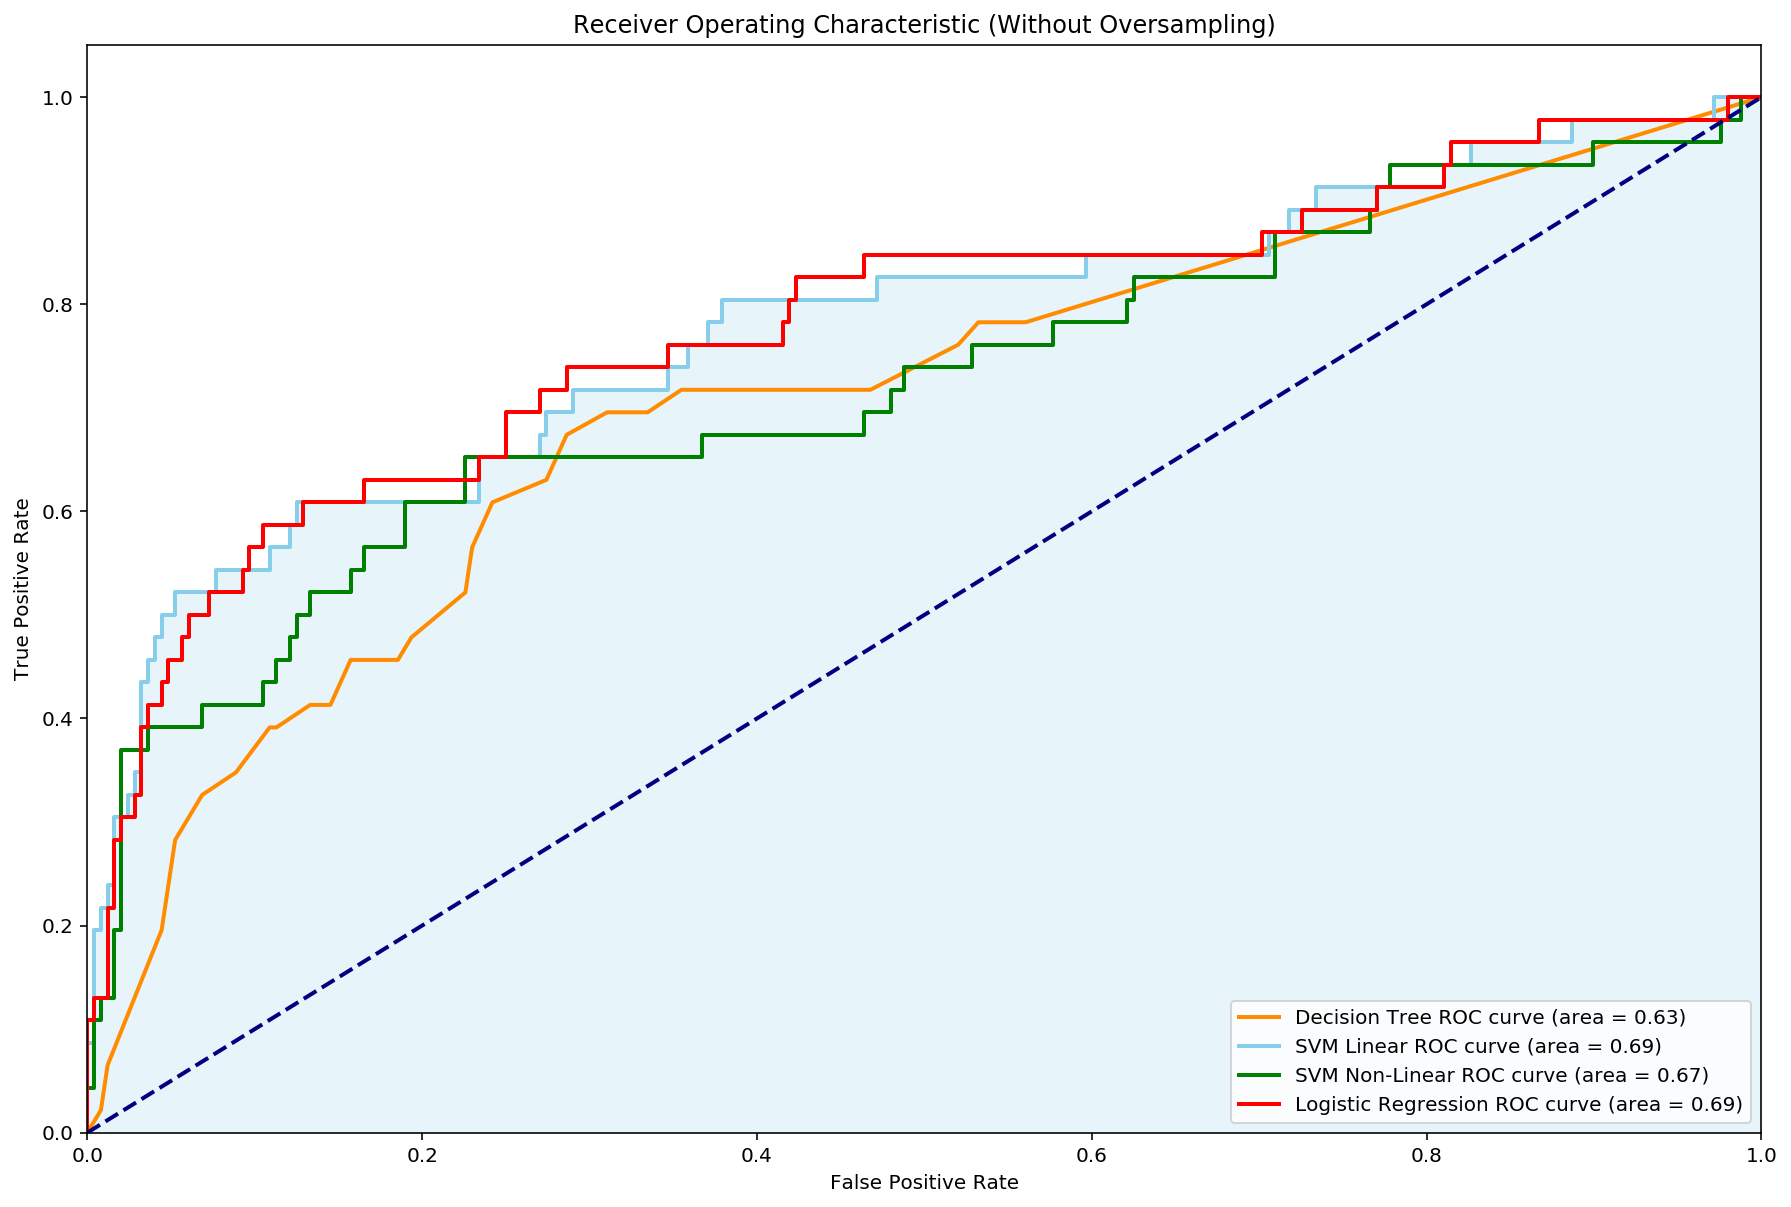

In [445]:
plt.figure(figsize=(15, 10))

plt.plot(tree1_fpr, tree1_tpr, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % tree1_auc)
plt.plot(svm_linear_fpr, svm_linear_tpr, color='skyblue', lw=2, label='SVM Linear ROC curve (area = %0.2f)' % svm_linear_auc)
plt.plot(svm_nonlinear_fpr, svm_nonlinear_tpr, color='green', lw=2, label='SVM Non-Linear ROC curve (area = %0.2f)' % svm_nonlinear_auc)
plt.plot(logi_fpr, logi_tpr, color='red', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % logi_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.fill_between(svm_linear_fpr, svm_linear_tpr, color='skyblue', alpha=0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Without Oversampling)')
plt.legend(loc="lower right")
plt.savefig('figures/roc_curves1.png', dpi=300)

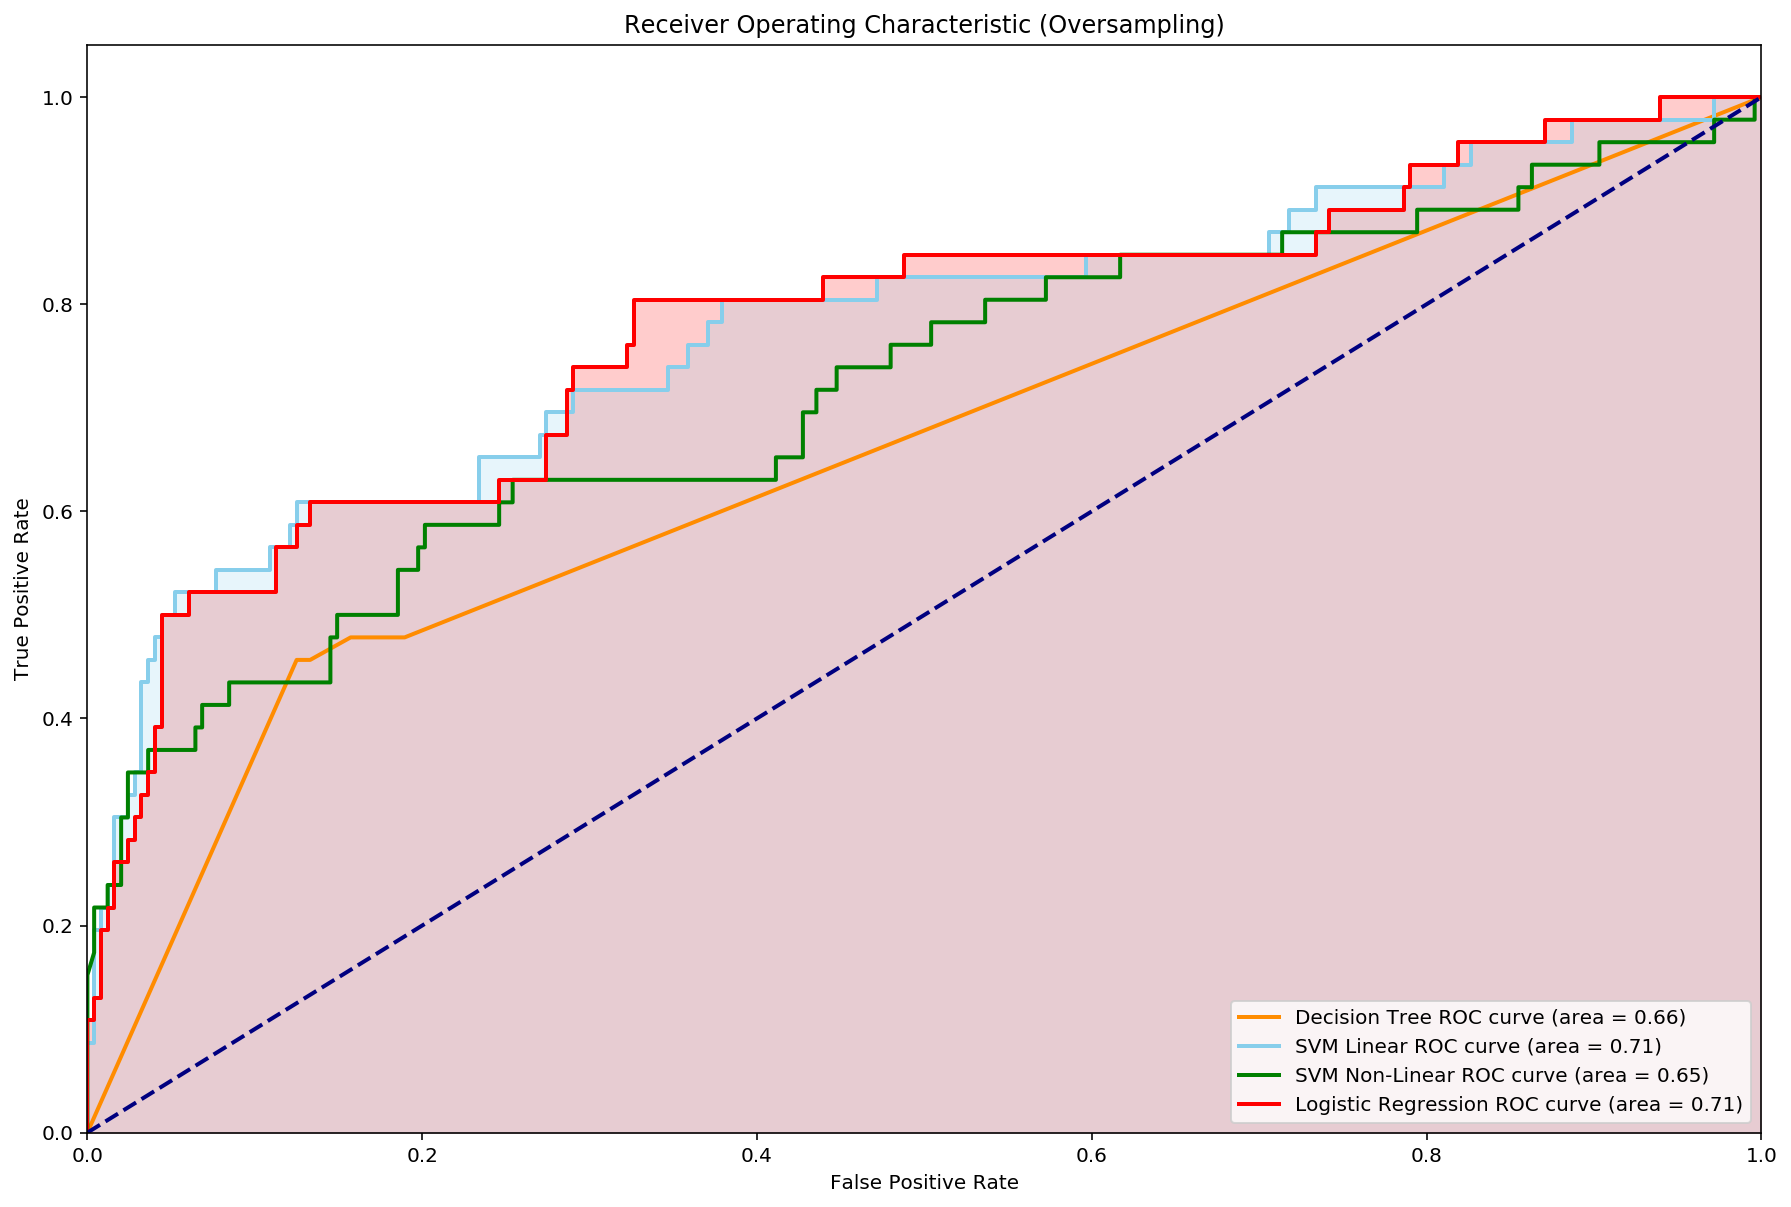

In [463]:
plt.figure(figsize=(15, 10))

plt.plot(tree2_fpr, tree2_tpr, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % tree2_auc)
plt.plot(svm_linear_smote_fpr, svm_linear_smote_tpr, color='skyblue', lw=2, label='SVM Linear ROC curve (area = %0.2f)' % svm_linear_smote_auc)
plt.plot(svm_nonlinear_smote_fpr, svm_nonlinear_smote_tpr, color='green', lw=2, label='SVM Non-Linear ROC curve (area = %0.2f)' % svm_nonlinear_smote_auc)
plt.plot(logi_smote_fpr, logi_smote_tpr, color='red', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % logi_smote_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.fill_between(logi_smote_fpr, logi_smote_tpr, color='red', alpha=0.2)
plt.fill_between(svm_linear_smote_fpr, svm_linear_smote_tpr, color='skyblue', alpha=0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Oversampling)')
plt.legend(loc="lower right")
plt.savefig('figures/roc_curves2.png', dpi=300)

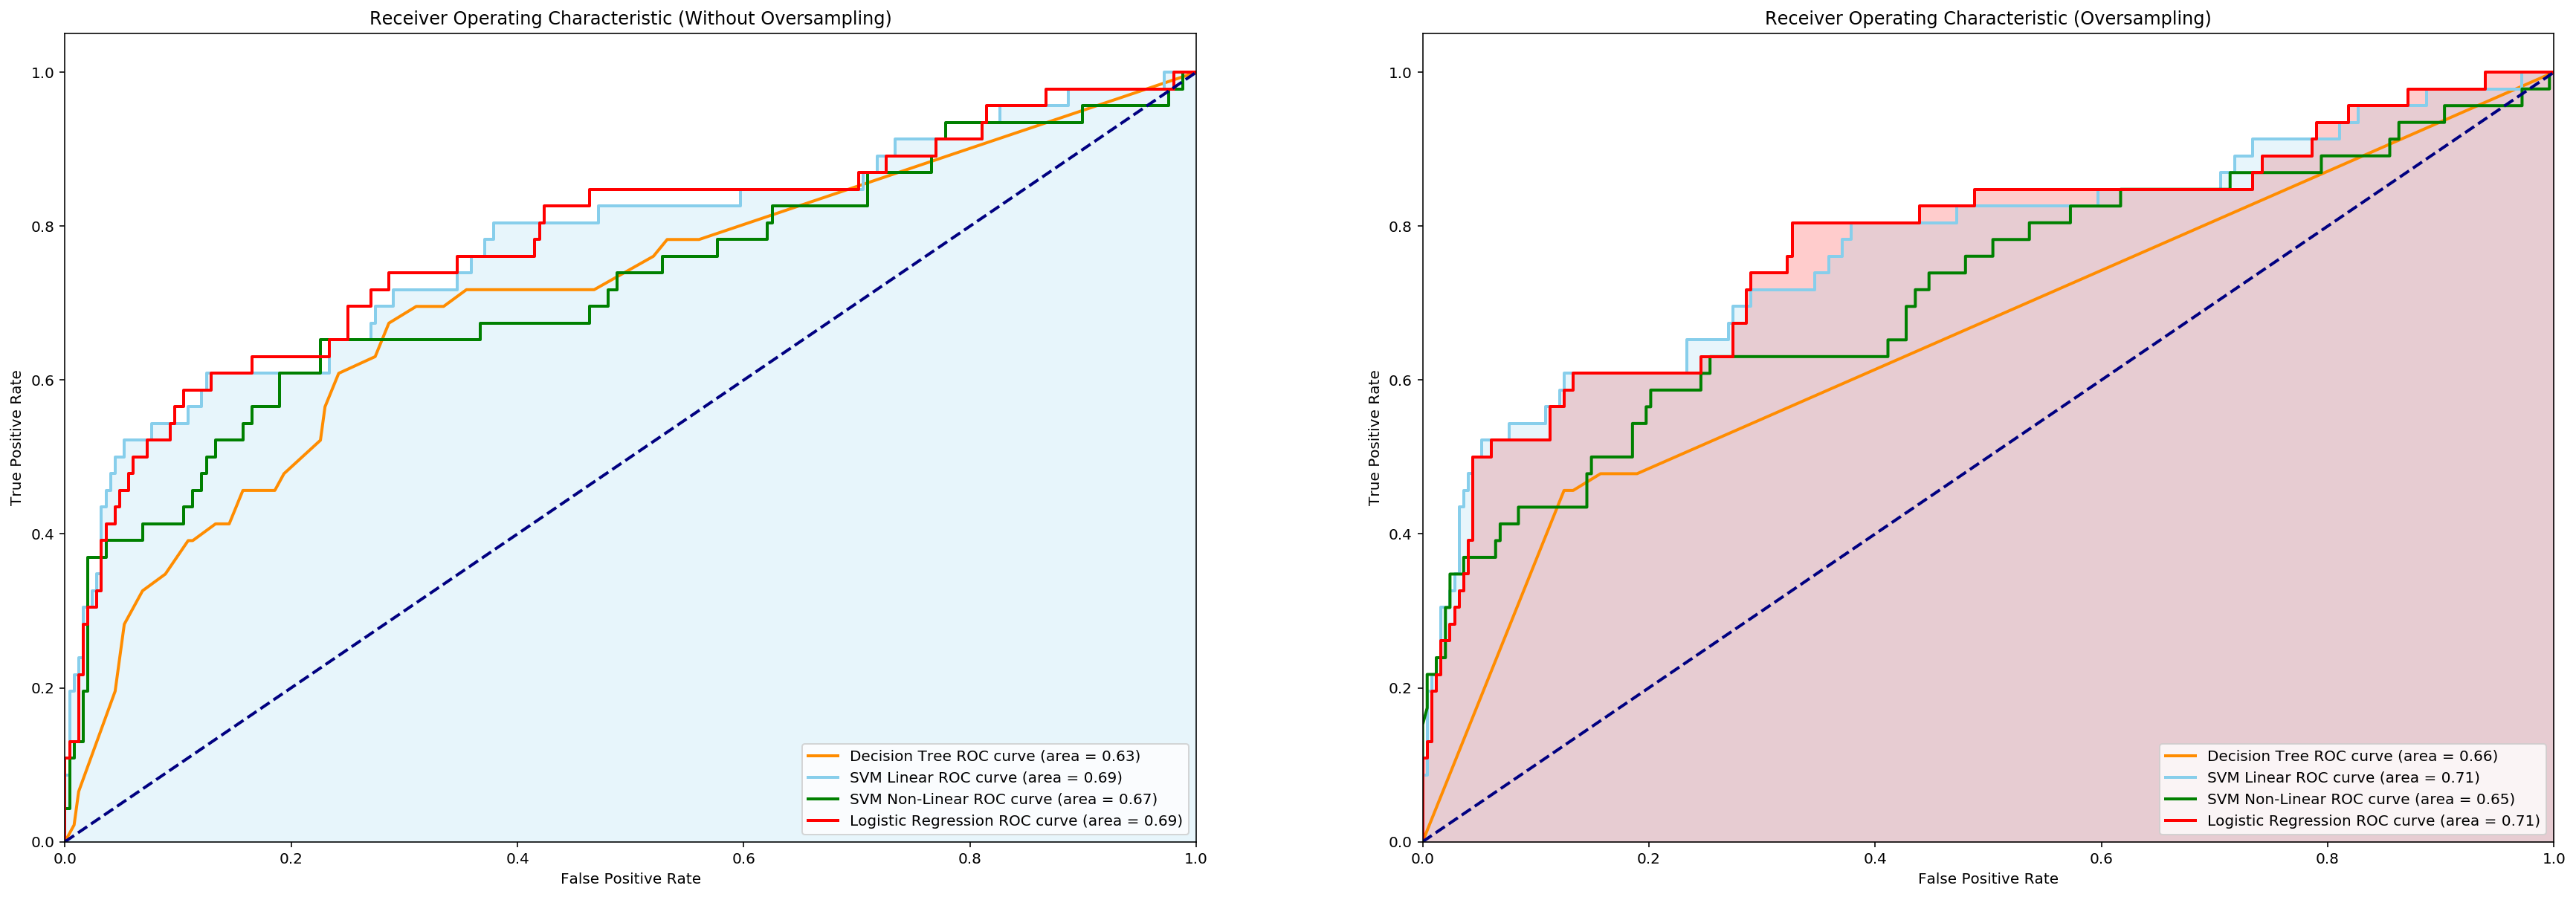

In [464]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.plot(tree1_fpr, tree1_tpr, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % tree1_auc)
plt.plot(svm_linear_fpr, svm_linear_tpr, color='skyblue', lw=2, label='SVM Linear ROC curve (area = %0.2f)' % svm_linear_auc)
plt.plot(svm_nonlinear_fpr, svm_nonlinear_tpr, color='green', lw=2, label='SVM Non-Linear ROC curve (area = %0.2f)' % svm_nonlinear_auc)
plt.plot(logi_fpr, logi_tpr, color='red', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % logi_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.fill_between(svm_linear_fpr, svm_linear_tpr, color='skyblue', alpha=0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Without Oversampling)')
plt.legend(loc="lower right")
# plt.savefig('figures/roc_curves1.png', dpi=300)

plt.subplot(1, 2, 2)
plt.plot(tree2_fpr, tree2_tpr, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % tree2_auc)
plt.plot(svm_linear_smote_fpr, svm_linear_smote_tpr, color='skyblue', lw=2, label='SVM Linear ROC curve (area = %0.2f)' % svm_linear_smote_auc)
plt.plot(svm_nonlinear_smote_fpr, svm_nonlinear_smote_tpr, color='green', lw=2, label='SVM Non-Linear ROC curve (area = %0.2f)' % svm_nonlinear_smote_auc)
plt.plot(logi_smote_fpr, logi_smote_tpr, color='red', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % logi_smote_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.fill_between(logi_smote_fpr, logi_smote_tpr, color='red', alpha=0.2)
plt.fill_between(svm_linear_smote_fpr, svm_linear_smote_tpr, color='skyblue', alpha=0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Oversampling)')
plt.legend(loc="lower right")
plt.savefig('figures/roc_curves3.png', dpi=300)

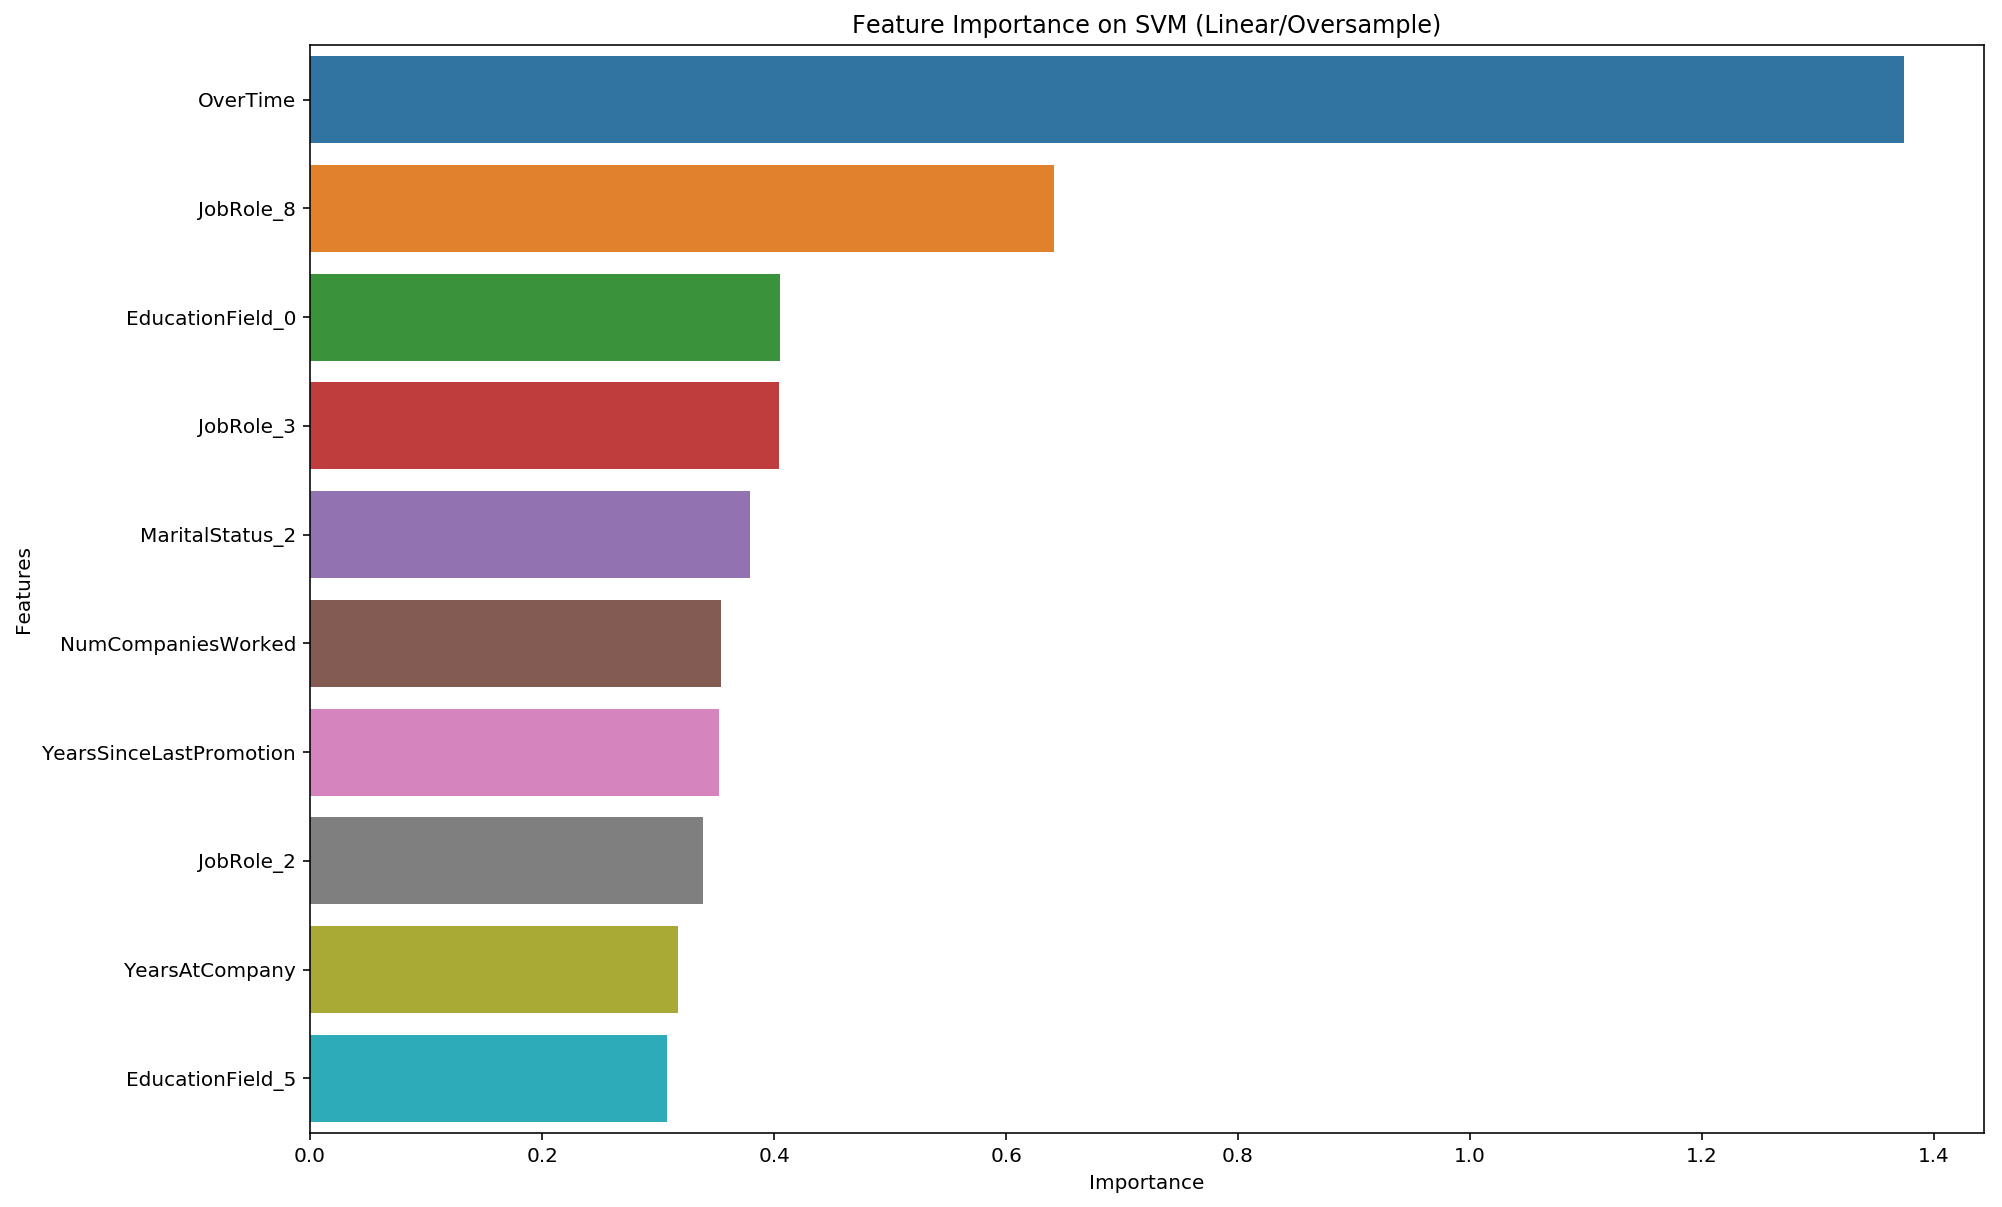

In [466]:
IP = pd.DataFrame({"Features": np.array(X.columns), "Importance": svm_linear_smote.coef_.ravel()})
IP = IP.sort_values(by=['Importance'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Features', data=IP[:10])
plt.title('Feature Importance on SVM (Linear/Oversample)')
plt.savefig('figures/svm_importance.png', dpi=300)